### **// Import necessary libraries**

In [ ]:
import pandas as pd # pd is used for data manipulation and analysis.
import numpy as np # np is used for numerical computations.
import matplotlib.pyplot as plt # plt is used for creating visualizations.
import seaborn as sns # sns is used for statistical data visualization.
import plotly.express as px # px is used for creating interactive visualizations.
import plotly.graph_objects as go # go is used for creating interactive graphs and visualizations.

from plotly.subplots import make_subplots # It allows you to create subplots within the plotly figures.
# Suppress(es) unnecessary warning messages.
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder # It is used to convert categorical labels into numeric form.
from sklearn.preprocessing import StandardScaler # It is used to remove the mean and scale the unit variance, ensuring all features are on the same scale.

from sklearn.model_selection import train_test_split # It is used to split a dataset into training and testing sets for evaluation and validation purposes.
from sklearn.neighbors import KNeighborsClassifier # It is used for classification tasks based on similarity to neighboring data points.

from sklearn.tree import DecisionTreeClassifier # It is used to create decision tree-based models for classification tasks.
from sklearn.ensemble import RandomForestClassifier # It is used to create a MLM that combines multiple decision trees to make predictions.

from sklearn.naive_bayes import GaussianNB # It is used for classification tasks based on bayes' theorem.
from sklearn.svm import SVC # It is used for classification tasks by constructing hyperplanes in a high-dimensional space to separate different classes.

from sklearn.neural_network import MLPClassifier # It is capable of learning complex relationships in data, often used for classification tasks.
from sklearn.ensemble import AdaBoostClassifier # It is used to combine multiple weak classifiers to build a strong classifier.

from sklearn.ensemble import GradientBoostingClassifier # It is used for implementing the gradient boosting ensemble learning method from the scikit-learn library.
from sklearn.ensemble import ExtraTreesClassifier # It is used to create and use an extra trees classifier for machine learning tasks.

from sklearn.linear_model import LogisticRegression # It is used to create and train logistic regression models for classification tasks.
from sklearn.model_selection import train_test_split # It is used to split a dataset into training and testing sets for evaluation and validation purposes.

from sklearn.metrics import accuracy_score # It is used to compute the accuracy of a classification model's predictions.
from xgboost import XGBClassifier # It enables us to utilize xgboost's gradient boosting algorithm for classification tasks.

from sklearn import metrics # It provides various functions for evaluating the performance of a MLM.
from sklearn.metrics import roc_curve # It is used to compute Receiver Operating Characteristic (ROC) curve points for a BCM.

from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report # It is used for evaluating the performance of a MLM.
from sklearn.ensemble import VotingClassifier # It is used to create an ensemble classifier that combines predictions from multiple individual classifiers using various voting strategies for improved performance.

In [ ]:
# Common libraries used in data visualization:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn.model_selection import KFold
from sklearn import feature_selection

from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve

from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

### **// Import the dataset**

In [ ]:
# Import the "Telecommunication.csv" file into a pandas DF
data = pd.read_csv('Telecommunication.csv')

### **// Data preparation**

The process of preparing raw data so that it is suitable for further processing and analysis is called as **Data preparation**.

In [ ]:
# Check if there are any missing values in the DF
data.isnull().any().any()

False

In [ ]:
# Display information about the DF
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Check the shape of the DF
data.shape

(7043, 21)

<Axes: >

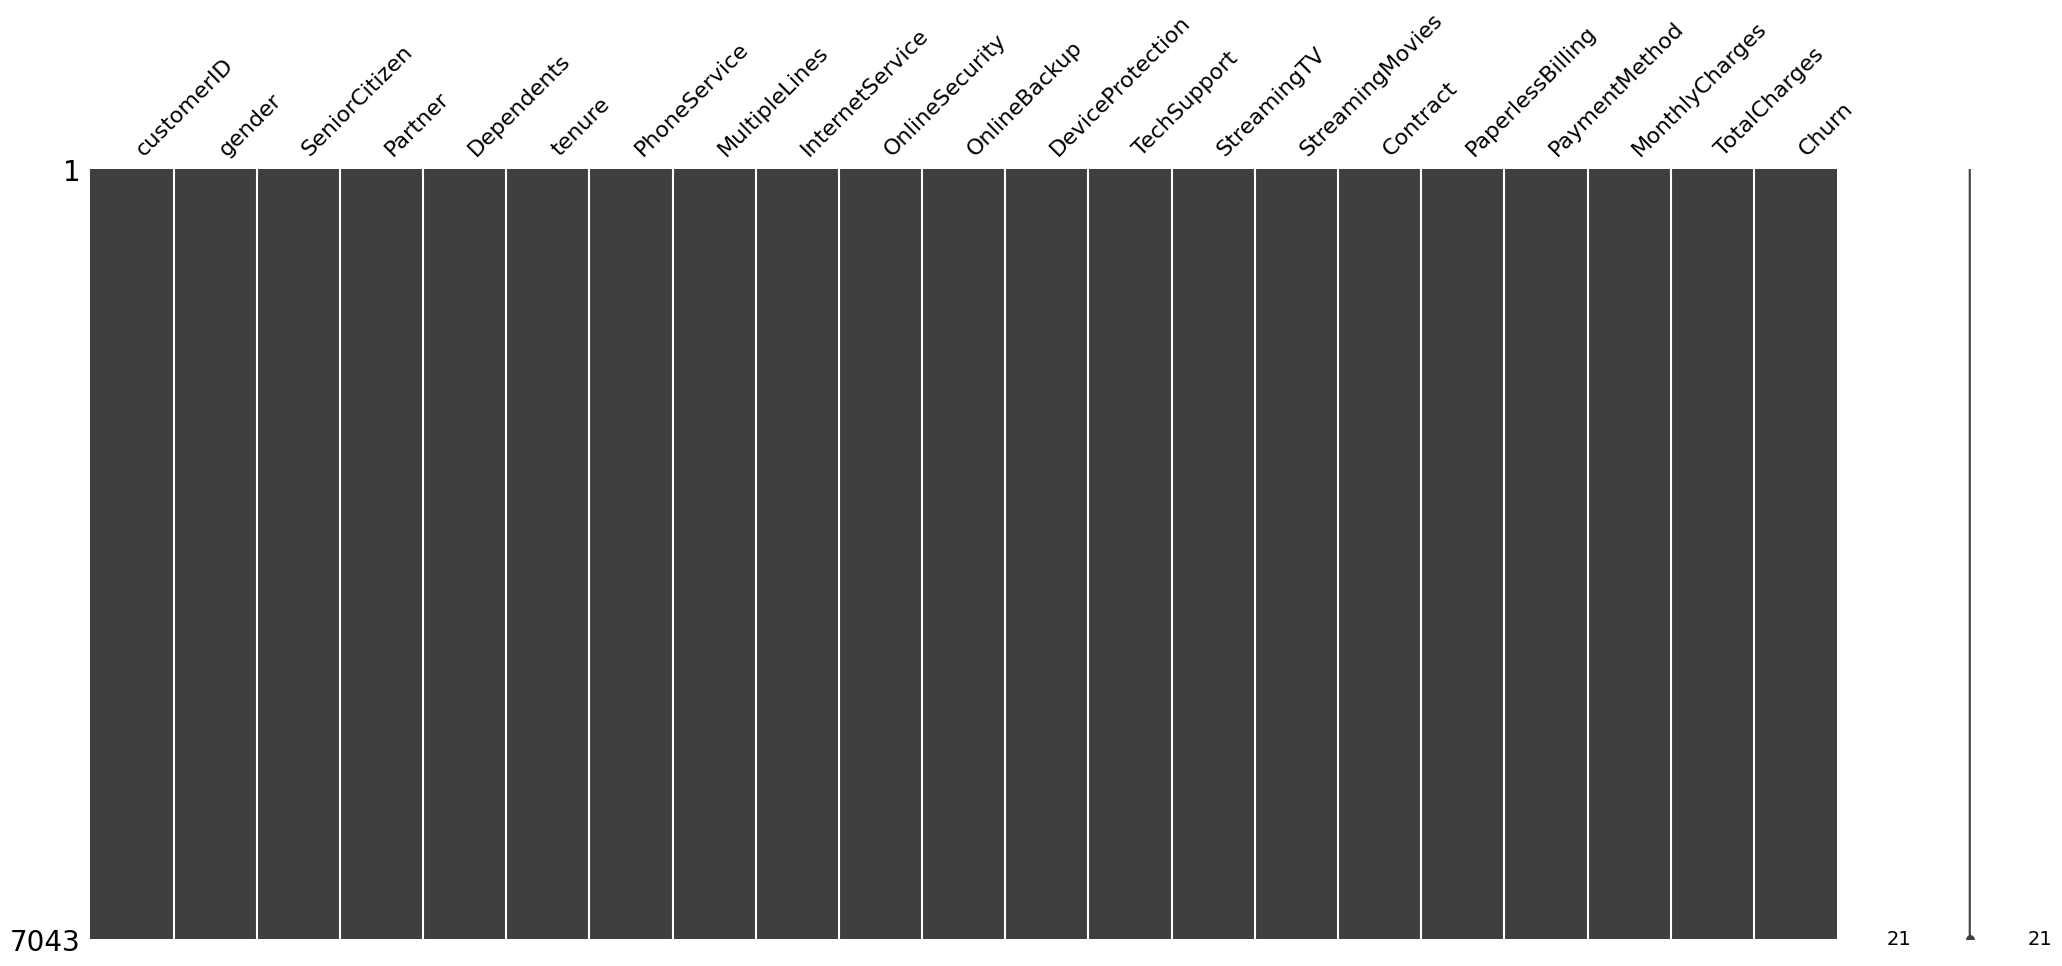

In [ ]:
import missingno as msno # msno is used for visualizing missing data.

# Display a matrix visualization of missing values in the DF
msno.matrix(data)

In [ ]:
# Remove the 'customerID' column from the DF
data = data.drop(["customerID"], axis=1)

# Display the first few rows of the updated DF
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Filter rows where 'TotalCharges' column has an empty string
data[data["TotalCharges"] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
# Convert 'TotalCharges' column to numeric, handling errors by converting them to NaN
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')

In [ ]:
# Calculate the number of missing values in each column of the DF
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# Select rows where the 'tenure' column equals 0
data[data["tenure"] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
# Drop rows from the DF where the 'tenure' column equals 0
data.drop(labels=data[data["tenure"] == 0].index, axis=0, inplace=True)

In [ ]:
# Fill missing values in the 'TotalCharges' column with the mean value
data.fillna(data["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
# Convert 'TotalCharges' column to numeric, handling errors by converting them to NaN
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')

In [ ]:
# Calculate the number of missing values in each column of the DF
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Display unique values of the 'SeniorCitizen' column in the DF
data.SeniorCitizen.unique()

array([0, 1])

In [ ]:
# Transform 'SeniorCitizen' column values from 0 and 1 to "No" and "Yes"
data.SeniorCitizen = data.SeniorCitizen.map({0: "No", 1: "Yes"})

# Display the first few rows of the updated DF
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Describe the 'InternetService' column including object and boolean types
data.InternetService.describe(include=["object", "bool"])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

### **// Exploratory Data Analysis (EDA)**

It is a common task performed by business analysts to discover patterns, understand relationships, validate assumptions, and identify anomalies in their data. This method is called as **Exploratory Data Analysis**.

In [ ]:
# Define the categories
type_ = ["No", "Yes"]

# Create a subplot figure
fig = make_subplots(rows=1, cols=1)

# Add a pie chart trace to the figure
fig.add_trace(go.Pie(labels=type_, values=data['Churn'].value_counts(), name="Churn"))

# Update the style of the pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

# Update the overall layout of the figure
fig.update_layout (
    title_text = 'CHURN DISTRIBUTION', annotations=[dict(text='CHURN', x=0.5, y=0.5, font_size=20, showarrow=False)])

# Display the figure
fig.show()

In [ ]:
# Calculate the number of customers who did not churn, grouped by gender
data.Churn[data.Churn == "No"].groupby(by=data.gender).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [ ]:
# Calculate the number of customers who churn, grouped by gender
data.Churn[data.Churn == "Yes"].groupby(by=data.gender).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

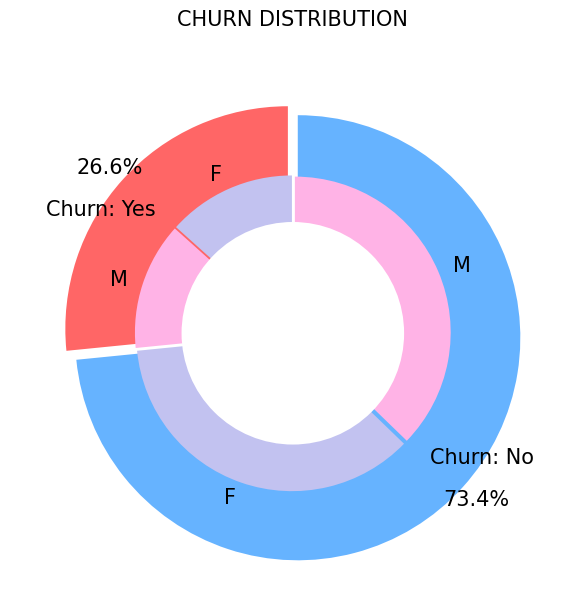

In [ ]:
# Set up data
plt.figure(figsize=(6, 6))
labels =["Churn: Yes", "Churn: No"]
values = [1869, 5163]
labels_gender = ["F", "M", "F", "M"]
sizes_gender = [939, 930, 2544, 2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0', '#ffb3e6', '#c2c2f0', '#ffb3e6']
explode = (0.3, 0.3)
explode_gender = (0.1, 0.1, 0.1, 0.1)
textprops = {"fontsize": 15}

# Create pie chart for churn distribution
plt.pie(values, labels=labels, autopct='%1.1f%%', pctdistance=1.08, labeldistance=0.8, colors=colors, startangle=90, frame=True, explode=explode, radius=10, textprops=textprops, counterclock=True, )
plt.pie(sizes_gender, labels=labels_gender, colors=colors_gender, startangle=90, explode=explode_gender, radius=7, textprops=textprops, counterclock=True, )

# Adding a white circle in the middle
centre_circle = plt.Circle((0, 0), 5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add title and adjust layout
plt.title('CHURN DISTRIBUTION', fontsize=15, y=1.1)
plt.axis('equal')
plt.tight_layout()

# Display the figure
plt.show()

In [ ]:
# Create a histogram for customer contract distribution
fig = px.histogram(data, x="Churn", color="Contract", barmode="group", title="CUSTOMER CONTRACT DISTRIBUTION")

# Customize layout settings such as width, height, and gap between bars
fig.update_layout(width=700, height=500, bargap=0.2)

# Display the figure
fig.show()

In [ ]:
# Extract unique payment methods and their counts
labels = data['PaymentMethod'].unique()
values = data['PaymentMethod'].value_counts()

# Create pie chart for payment method distribution
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

# Update layout
fig.update_layout(title_text="PAYMENT METHOD DISTRIBUTION")

# Display the figure
fig.show()

In [ ]:
# Create a histogram for customer payment method distribution
fig = px.histogram(data, x="Churn", color="PaymentMethod", title="CUSTOMER PAYMENT METHOD DISTRIBUTION")

# Customize layout settings such as width, height, and gap between bars
fig.update_layout(width=700, height=500, bargap=0.1)

# Display the figure
fig.show()

In [ ]:
# Count the occurrences of 'InternetService' and 'Churn' columns for male
data[data["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

In [ ]:
# Count the occurrences of 'InternetService' and 'Churn' columns for female
data[data["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
Name: count, dtype: int64

In [ ]:
# Create a new plotly figure
fig = go.Figure()

# Add data for 'DSL' internet service
fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

# Add data for 'Fiber optic' internet service
fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

# Add data for 'No Internet' service
fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

# Update layout
fig.update_layout(title_text="CHURN DISTRIBUTION w.r.t. INTERNET SERVICE & GENDER")

# Display the figure
fig.show()

In [ ]:
# Define a color map for the 'Dependents' column
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}

# Create a histogram for dependents distribution
fig = px.histogram(data, x="Churn", color="Dependents", barmode="group", title="DEPENDENTS DISTRIBUTION", color_discrete_map=color_map)

# Customize layout settings such as width, height, and gap between bars
fig.update_layout(width=700, height=500, bargap=0.1)

# Display the figure
fig.show()

In [ ]:
# Define a color map for the 'Partner' column
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}

# Create a histogram for churn distribution w.r.t. partners
fig = px.histogram(data, x="Churn", color="Partner", barmode="group", title="CHURN DISTRIBUTION w.r.t. PARTNER", color_discrete_map=color_map)

# Customize layout settings such as width, height, and gap between bars
fig.update_layout(width=700, height=500, bargap=0.1)

# Display the figure
fig.show()

In [ ]:
# Define a color map for the 'SeniorCitizen' column
color_map = {"Yes": '#00CC96', "No": '#B6E880'}

# Create a histogram for churn distribution w.r.t. senior citizen
fig = px.histogram(data, x="Churn", color="SeniorCitizen", title="CHURN DISTRIBUTION w.r.t. SENIOR CITIZEN", color_discrete_map=color_map)

# Customize layout settings such as width, height, and gap between bars
fig.update_layout(width=700, height=500, bargap=0.1)

# Display the figure
fig.show()

In [ ]:
# Define a color map for the 'OnlineSecurity' column
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}

# Create a histogram for churn distribution w.r.t. online security
fig = px.histogram(data, x="Churn", color="OnlineSecurity", barmode="group", title="CHURN DISTRIBUTION w.r.t. ONLINE SECURITY", color_discrete_map=color_map)

# Customize layout settings such as width, height, and gap between bars
fig.update_layout(width=700, height=500, bargap=0.1)

# Display the figure
fig.show()

In [ ]:
# Define a color map for the 'PaperlessBilling' column
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}

# Create a histogram for churn distribution w.r.t. paperless billing
fig = px.histogram(data, x="Churn", color="PaperlessBilling",  title="CHURN DISTRIBUTION w.r.t. PAPERLESS BILLING", color_discrete_map=color_map)

# Customize layout settings such as width, height, and gap between bars
fig.update_layout(width=700, height=500, bargap=0.1)

# Display the figure
fig.show()

In [ ]:
# Create a histogram for churn distribution w.r.t. tech support
fig = px.histogram(data, x="Churn", color="TechSupport", barmode="group", title="CHURN DISTRIBUTION w.r.t. TECH SUPPORT")

# Customize layout settings such as width, height, and gap between bars
fig.update_layout(width=700, height=500, bargap=0.1)

# Display the figure
fig.show()

In [ ]:
# Define a color map for the 'PhoneService' column
color_map = {"Yes": '#00CC96', "No": '#B6E880'}

# Create a histogram for churn distribution w.r.t. phone service
fig = px.histogram(data, x="Churn", color="PhoneService", title="CHURN DISTRIBUTION w.r.t. PHONE SERVICE", color_discrete_map=color_map)

# Customize layout settings such as width, height, and gap between bars
fig.update_layout(width=700, height=500, bargap=0.1)

# Display the figure
fig.show()

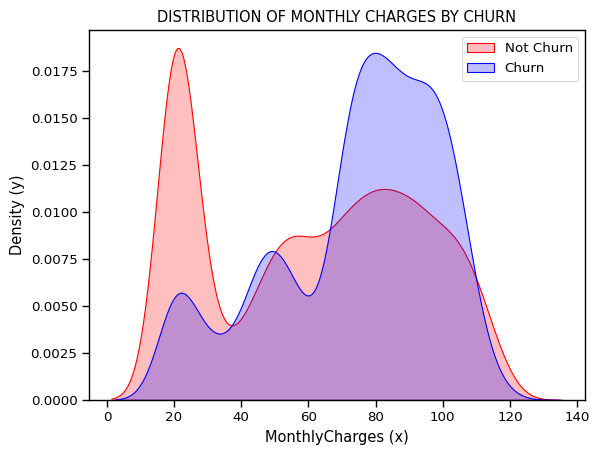

In [ ]:
# Set the context and font scale for seaborn
sns.set_context("paper", font_scale=1.1)

# Create a kernel density estimate plot for MonthlyCharges
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No')], color="Red", shade=True);

# Overlay another kernel density estimate plot for Churn
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes')], ax=ax, color="Blue", shade=True);

# Add a legend indicating the meaning of the plotted lines
ax.legend(["Not Churn", "Churn"], loc='upper right');

# Set the x-axis label
ax.set_xlabel("MonthlyCharges (x)");

# Set the y-axis label
ax.set_ylabel("Density (y)");

# Set the title of the plot
ax.set_title("DISTRIBUTION OF MONTHLY CHARGES BY CHURN");

# ---------------------------------------------------------- #

# Customers with high MonthlCharges are more likely to Churn #

# ---------------------------------------------------------- #

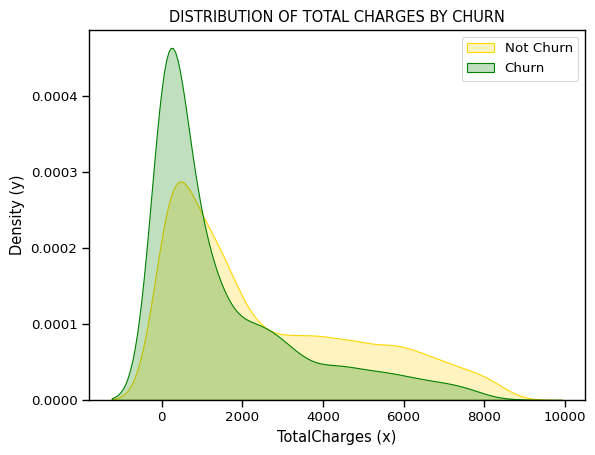

In [ ]:
# Create a kernel density estimate plot for TotalCharges
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No')], color="Gold", shade=True);

# Overlay another kernel density estimate plot for Churn
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes')], ax=ax, color="Green", shade=True);

# Add a legend indicating the meaning of the plotted lines
ax.legend(["Not Churn", "Churn"], loc='upper right');

# Set the x-axis label
ax.set_xlabel("TotalCharges (x)");

# Set the y-axis label
ax.set_ylabel("Density (y)");

# Set the title of the plot
ax.set_title("DISTRIBUTION OF TOTAL CHARGES BY CHURN");

In [ ]:
# Plot a box plot of 'tenure' against 'Churn'
fig = px.box(data, x='Churn', y='tenure')

# Change the title of the x-axis
fig.update_xaxes(title_text='Churn (x)', row=1, col=1)

# Change the title of the y-axis
fig.update_yaxes(title_text='Tenure (y)', row=1, col=1)

# # Customize layout settings such as autosize, width, height, and title
fig.update_layout(autosize=True, width=750, height=600, title="TENURE vs CHURN", )

# Display the figure
fig.show()

# ---------------------------------------------------------- #

#           New customers are more likely to Churn           #

# ---------------------------------------------------------- #

In [ ]:
# Initializing LabelEncoder
le = LabelEncoder()
values

# Label encoding categorical columns with only two unique values
le_count = 0
for col in data.columns[1:]:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 2:
            le.fit(data[col])
            data[col] = le.transform(data[col])
            le_count += 1

# Print the number of columns label encoded
print('{} columns were label encoded.'.format(le_count))

6 columns were label encoded.


Text(0.5, 1.0, 'CORRELATION WITH CHURN RATE')

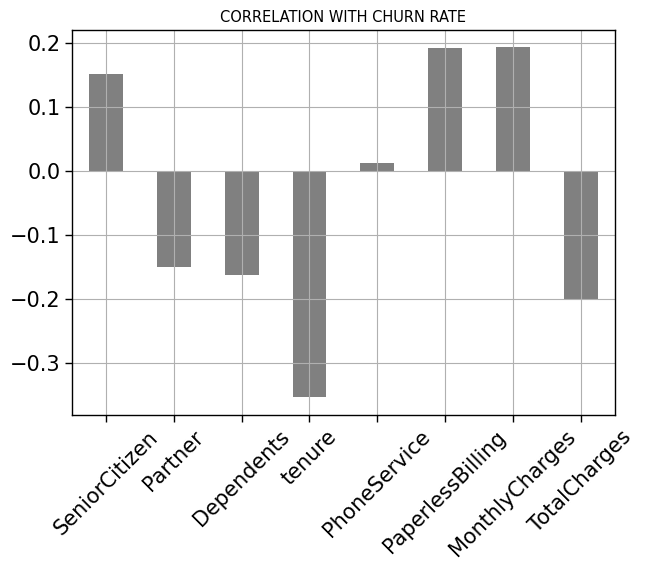

In [ ]:
# Select specific columns from the DF
data2 = data[['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']]

# Calculate correlations of selected columns with the 'Churn' column
correlations = data2.corrwith(data.Churn)

# Filter out correlations that are not equal to 1
correlations = correlations[correlations != 1]

# Separate positive and negative correlations
positive_correlations = correlations[correlations>0].sort_values(ascending=False)
negative_correlations = correlations[correlations<0].sort_values(ascending=False)

# Plot correlations as a bar chat
correlations.plot.bar(figsize=(7, 5), fontsize=15, color='grey', rot=45, grid=True)
plt.title("CORRELATION WITH CHURN RATE")

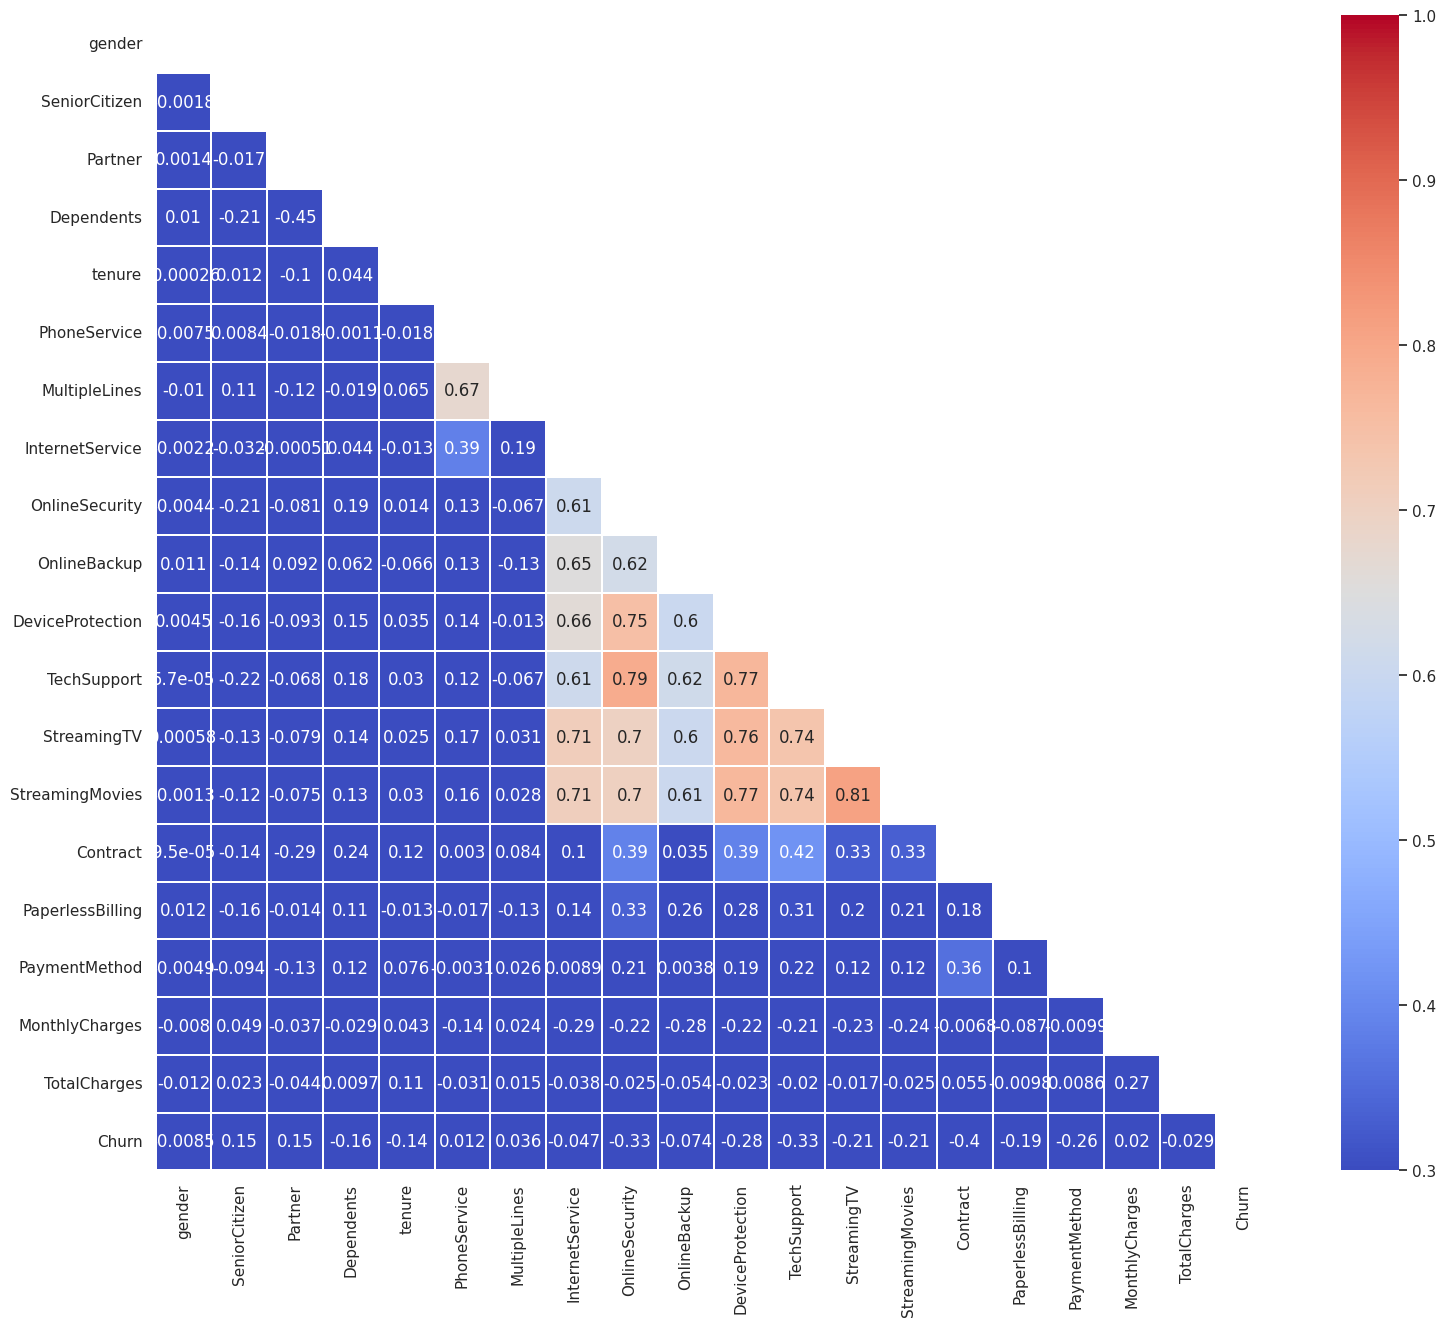

In [ ]:
# Set the seaborn style to 'white'
sns.set(style="white")

# Create a heatmap of correlation matrix
plt.figure(figsize=(18, 15))
corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=0.3, vmax=1)

<Axes: >

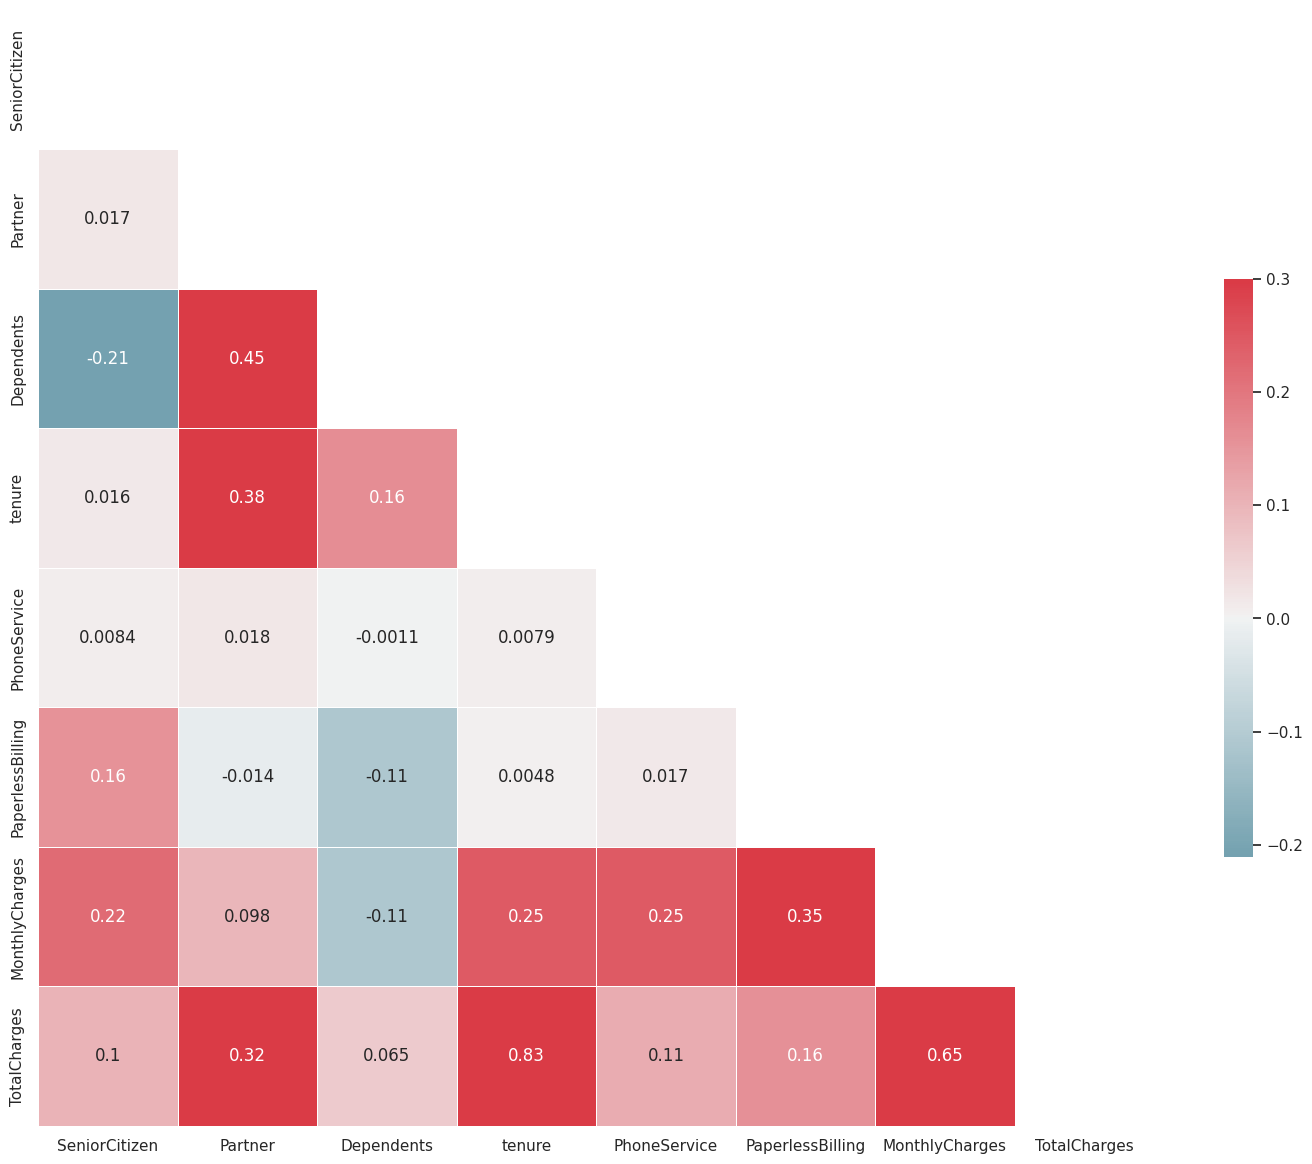

In [ ]:
# Set the seaborn style to 'white'
sns.set(style="white")

# Compute the correlation matrix
corr = data2.corr()

# Create a mask for the upper triangle of the correlation matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Create a matplotlib figure and axes
f, ax = plt.subplots(figsize=(18, 15))

# Define a color palette for the heatmap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create a heatmap of correlation matrix
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, annot=True, linewidths=.5, cbar_kws={"shrink":.5})

In [ ]:
# Define a function to encode categorical data
def encode_data(dataframe):
    if dataframe.dtype == "object":
        dataframe = LabelEncoder().fit_transform(dataframe)
    return dataframe

# Apply the 'encode_data' function to all columns in the DF
data = data.apply(lambda x: encode_data(x))

# Display the first few rows of the updated DF
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
# Assign features to X by dropping the 'Churn' column
X = data.drop(columns="Churn")

# Assign the target variable 'Churn' to y as an array
y = data["Churn"].values

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4, stratify=y)

In [ ]:
# Define a function to create a distribution plot for the given feature(s) in a DF
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8, 3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color=color)

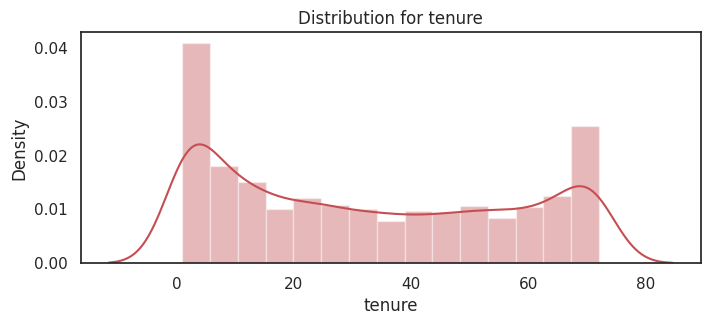

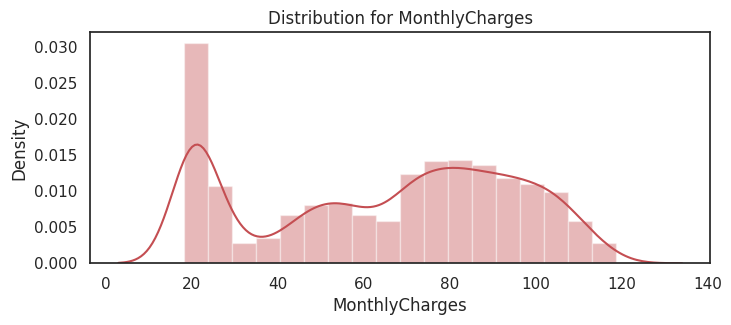

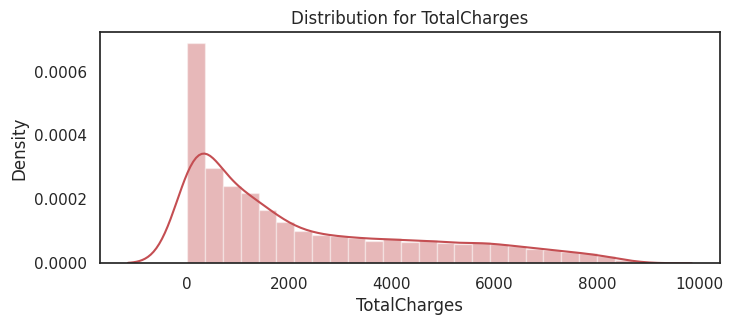

In [ ]:
col = ["tenure", 'MonthlyCharges', 'TotalCharges']
for features in col :distplot(features, data)

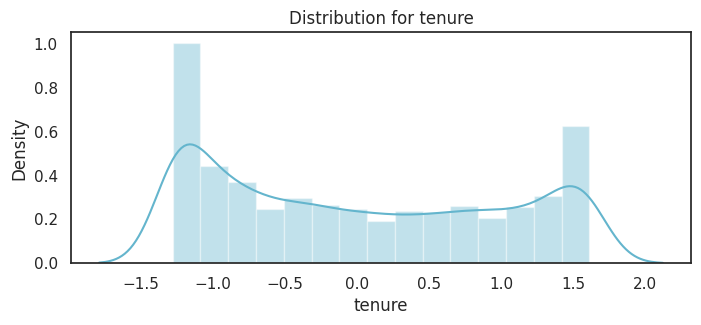

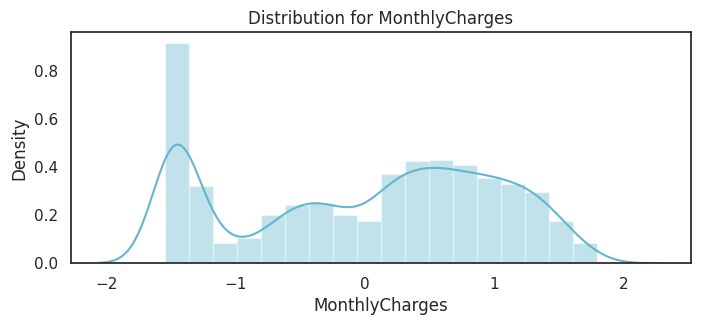

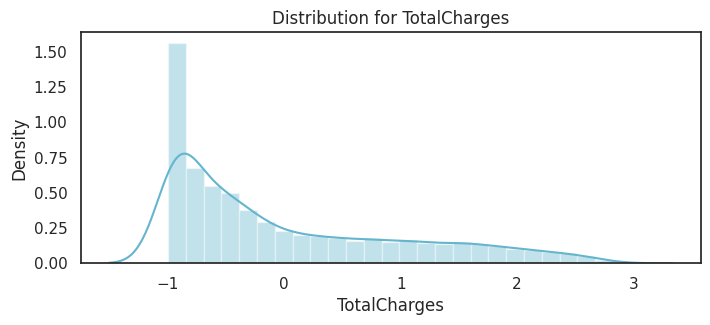

In [ ]:
# Standardize the data
data_std = pd.DataFrame(StandardScaler().fit_transform(data[col]).astype('float64'), columns=col)

# Plot the distribution of each feature
for feat in col: distplot(feat, data_std, color='c')

In [ ]:
# Display column names in a DF
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Display unique values for each column in the DF
for i in data.columns:
    print(i, ":", data[i].unique())

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [1 0 2]
InternetService : [0 1 2]
OnlineSecurity : [0 2 1]
OnlineBackup : [2 0 1]
DeviceProtection : [0 2 1]
TechSupport : [0 2 1]
StreamingTV : [0 2 1]
StreamingMovies : [0 2 1]
Contract : [0 1 2]
PaperlessBilling : [1 0]
PaymentMethod : [2 3 0 1]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [ ]:
# Identify categorical columns for label encoding
cat_cols_ohe = ['PaymentMethod', 'Contract', 'InternetService']

# Identify categorical columns for label encoding by excluding specific columns
cat_cols_le = list(set(X_train.columns) - set(col) - set(cat_cols_ohe))

# Print the list of categorical columns
print(cat_cols_le)

['TechSupport', 'Partner', 'StreamingTV', 'OnlineBackup', 'MultipleLines', 'OnlineSecurity', 'StreamingMovies', 'gender', 'SeniorCitizen', 'PaperlessBilling', 'DeviceProtection', 'PhoneService', 'Dependents']


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train[col] = StandardScaler().fit_transform(X_train[col])
X_test[col] = StandardScaler().fit_transform(X_test[col])

In [ ]:
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=0, class_weight='balanced')))
models.append(('Support Vector Classifier', SVC(kernel='linear', random_state=0)))
models.append(('Kernel SVM', SVC(kernel='rbf', random_state=0)))
models.append(('K-Nearest Neighbour', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)))
models.append(('Gaussian Naive Bayes', GaussianNB()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion='entropy', random_state=0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
models.append(('Voting Classifier', VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()), ('lr', LogisticRegression()), ('abc', AdaBoostClassifier())], voting='soft')))

### **// Evaluating the model results**

In [ ]:
acc_results = [] # List to store accuracy results
auc_results = [] # List to store ROC AUC results
names = [] # List to store model names

# Define columns for the result DF
result_col = ["Algorithm", "ROC AUC Mean", "ROC AUC STD", "Accuracy Mean", "Accuracy STD"]

# Create an empty DF to store model results
model_results = pd.DataFrame(columns = result_col)

i = 0 # Initialize index counter

# Iterate over models list
for name, model in models:
    # Append model name to names list
    names.append(name)

    # Define KFold cross-validator
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)

    # Perform cross-validation for accuracy
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")

    # Perform cross-validation for ROC AUC
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="roc_auc")

    # Append accuracy and ROC AUC results to respective lists
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)

    # Add results to the model_results DF
    model_results.loc[i] = [name,
                            round(cv_auc_results.mean() * 100, 2),
                            round(cv_auc_results.std() * 100, 2),
                            round(cv_acc_results.mean() * 100, 2),
                            round(cv_acc_results.std() * 100, 2)]
    i += 1 # Increment index counter

# Sort model_results DF by 'ROC AUC Mean' column in descending order
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
9,Voting Classifier,84.79,1.33,79.89,2.22
8,Gradient Boosting Classifier,84.63,1.44,79.36,2.05
0,Logistic Regression,84.30,1.27,74.64,1.66
7,AdaBoost,84.22,1.54,79.72,2.18
1,Support Vector Classifier,82.94,1.32,79.07,1.44
6,Random Forest,82.92,2.02,78.83,1.94
4,Gaussian Naive Bayes,82.19,2.20,75.38,1.60
2,Kernel SVM,79.68,1.66,79.34,1.86
3,K-Nearest Neighbour,77.23,2.33,75.86,1.78
5,Decision Tree Classifier,65.42,2.48,72.57,2.43


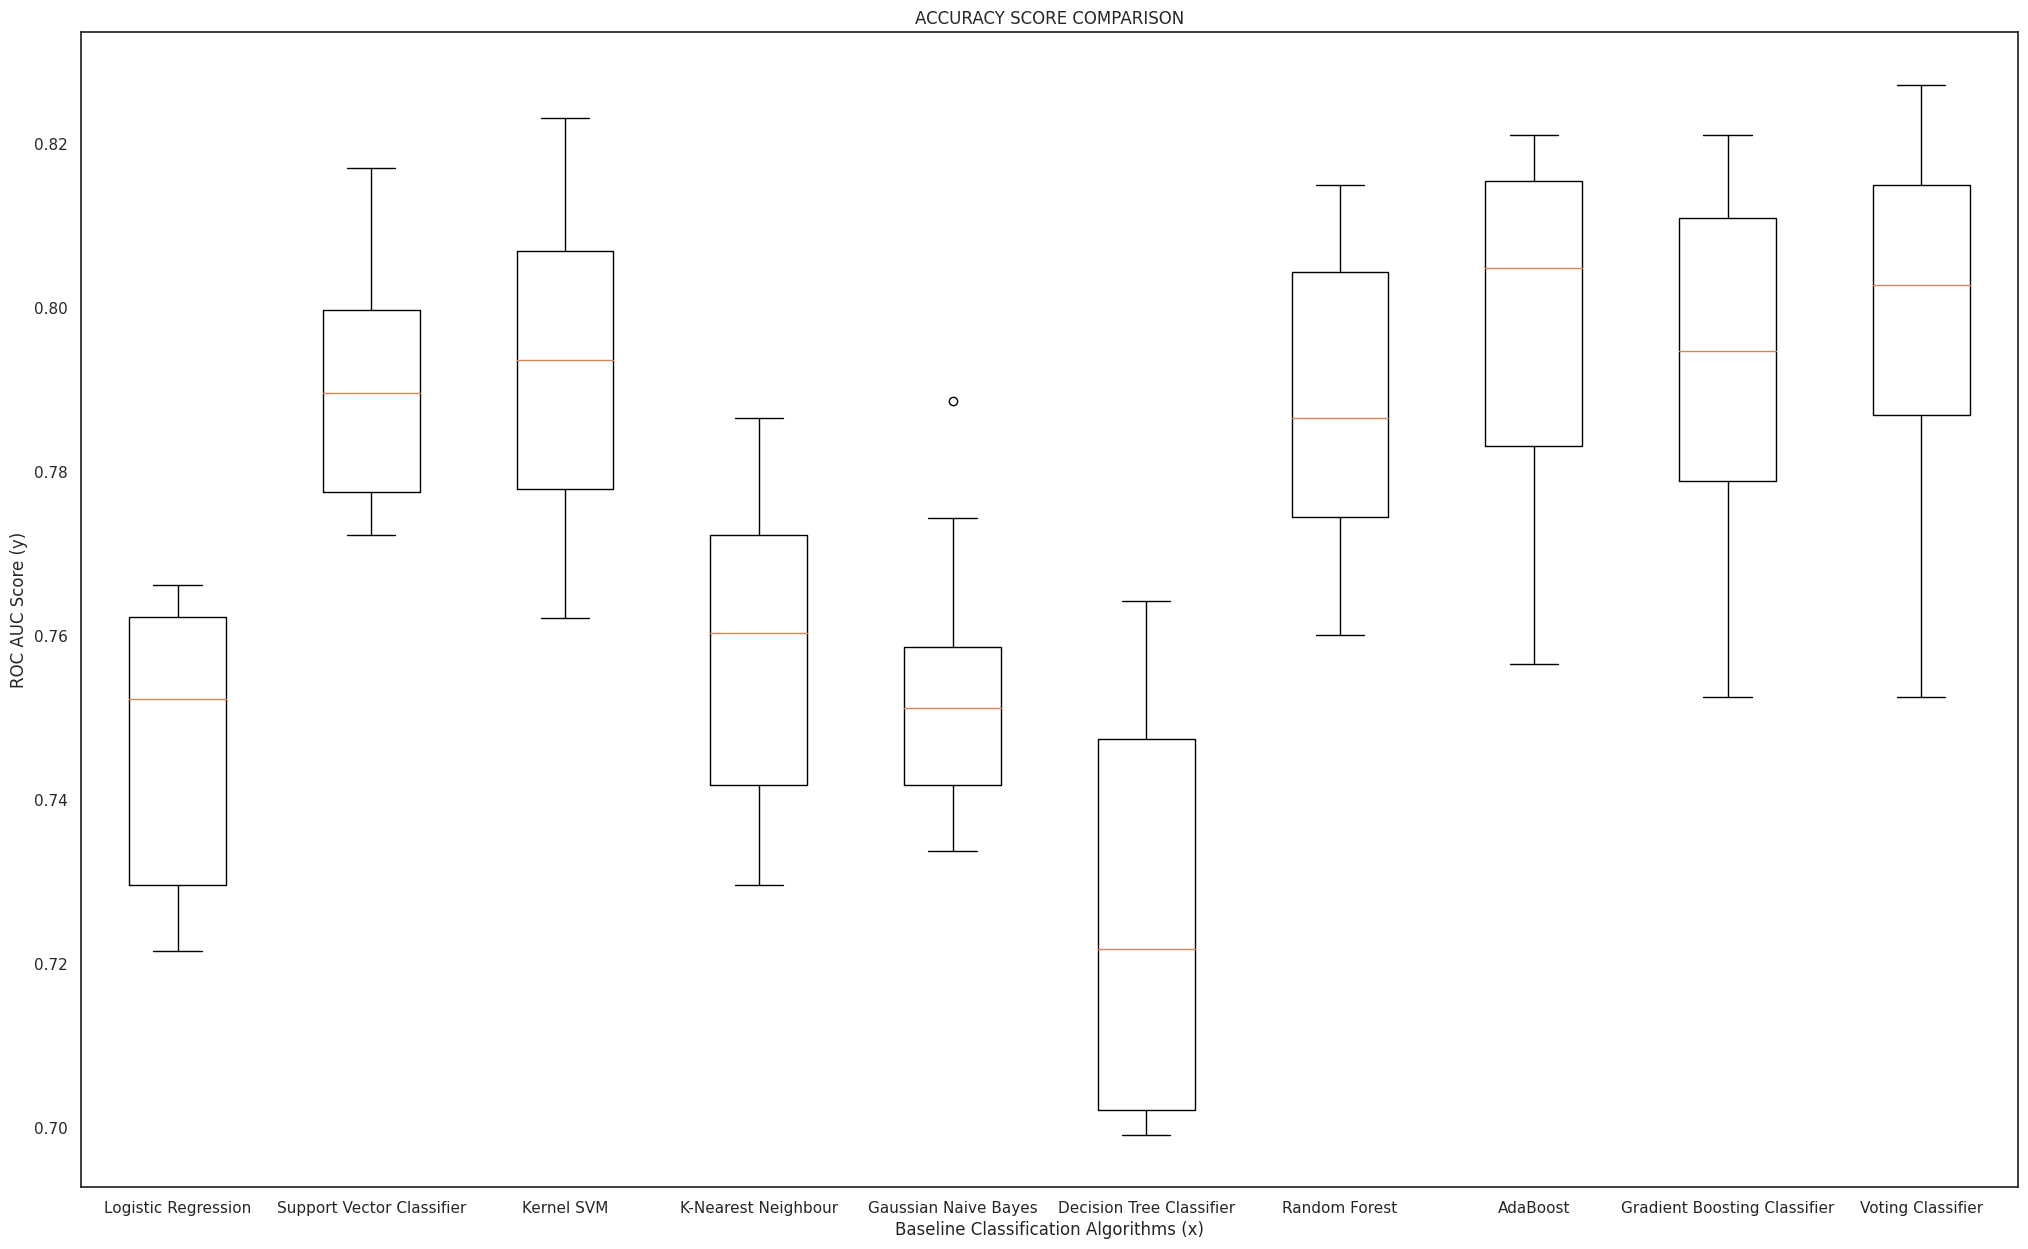

In [ ]:
# Create a boxplot for accuracy results
fig = plt.figure(figsize=(25, 15))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)

# Set the x-axis label
plt.xlabel("Baseline Classification Algorithms (x)")

# Set the y-axis label
plt.ylabel("ROC AUC Score (y)")

# Set the title of the plot
plt.title("ACCURACY SCORE COMPARISON")

# Display the plot
plt.show()

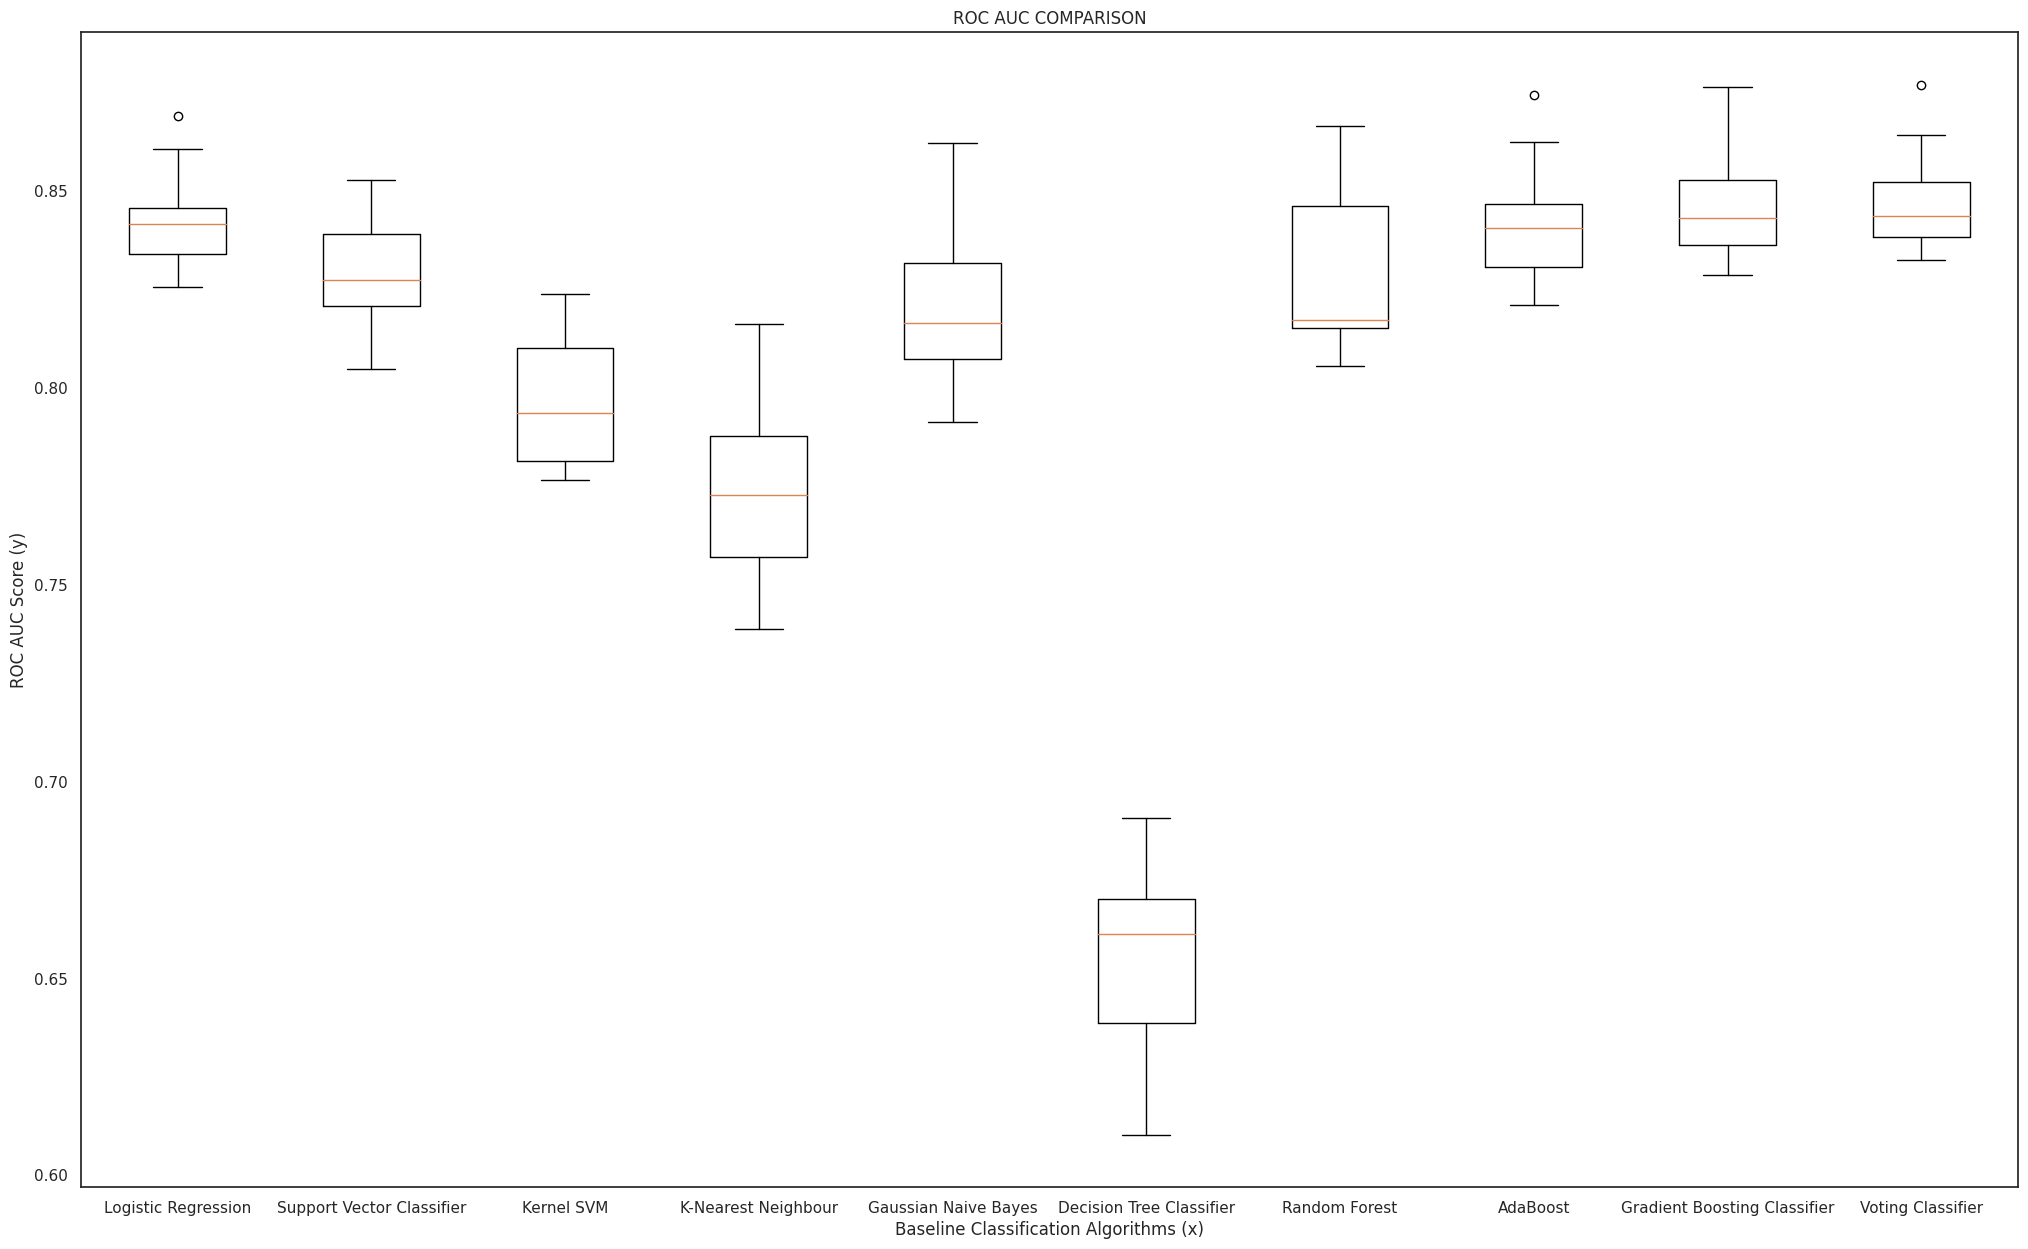

In [ ]:
# Create a boxplot for accuracy results
fig = plt.figure(figsize=(25, 15))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)

# Set the x-axis label
plt.xlabel("Baseline Classification Algorithms (x)")

# Set the y-axis label
plt.ylabel("ROC AUC Score (y)")

# Set the title of the plot
plt.title("ROC AUC COMPARISON")

# Display the plot
plt.show()

### **// K-Nearest Neighbour**

In [ ]:
# Initialize an empty list to store scores
score_array = []

# Loop through values of k from 1 to 24
for each in range(1, 25):
    # Initialize a KNeighborsClassifier with current value of k
    knn_loop = KNeighborsClassifier(n_neighbors=each)

    # Train the classifier
    knn_loop.fit(X_train, y_train)

    # Calculate and append the accuracy score to the list
    score_array.append(knn_loop.score(X_test, y_test))

# Display the list
score_array

[0.7156398104265402,
 0.7573459715639811,
 0.7469194312796209,
 0.771563981042654,
 0.7720379146919432,
 0.7900473933649289,
 0.781042654028436,
 0.7843601895734598,
 0.776303317535545,
 0.785781990521327,
 0.7781990521327015,
 0.781042654028436,
 0.7781990521327015,
 0.7805687203791469,
 0.781042654028436,
 0.7853080568720379,
 0.7838862559241706,
 0.790521327014218,
 0.7890995260663507,
 0.790521327014218,
 0.790521327014218,
 0.7890995260663507,
 0.7914691943127962,
 0.7924170616113744]

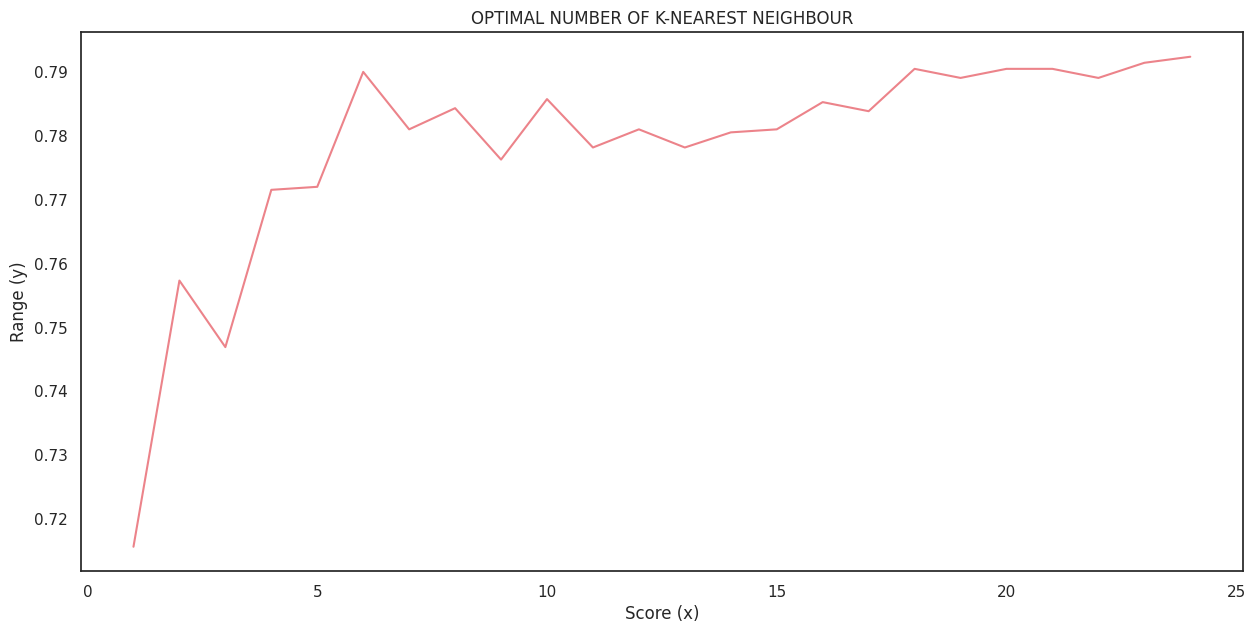

In [ ]:
# Create a figure with specified size
fig = plt.figure(figsize=(15, 7))

# Plot data with specified color
plt.plot(range(1, 25), score_array, color='#ec838a')

# Set the x-axis label
plt.xlabel("Score (x)")

# Set the y-axis label
plt.ylabel("Range (y)")

# Set the title of the plot
plt.title("OPTIMAL NUMBER OF K-NEAREST NEIGHBOUR")

# plt.legend(loc='top right', fontsize="medium")

# Display the plot
plt.show()

### **// Random Forest**

In [ ]:
# Initialize an empty list to store scores
score_array = []

# Loop through values of k from 1 to 99
for each in range(1, 100):
    # Initialize a RandomForestClassifier with current value of k
    rf_loop = RandomForestClassifier(n_estimators=each, random_state=1)

    # Train the classifier
    rf_loop.fit(X_train, y_train)

    # Calculate and append the accuracy score to the list
    score_array.append(rf_loop.score(X_test, y_test))

# Display the list
score_array

[0.7109004739336493,
 0.7511848341232228,
 0.7374407582938388,
 0.7578199052132701,
 0.7568720379146919,
 0.7720379146919432,
 0.7592417061611374,
 0.7682464454976303,
 0.7658767772511849,
 0.7682464454976303,
 0.7668246445497631,
 0.7720379146919432,
 0.771563981042654,
 0.7758293838862559,
 0.7744075829383886,
 0.7781990521327015,
 0.7758293838862559,
 0.781042654028436,
 0.7777251184834123,
 0.776303317535545,
 0.7734597156398104,
 0.7805687203791469,
 0.7838862559241706,
 0.7853080568720379,
 0.7829383886255924,
 0.7890995260663507,
 0.7848341232227488,
 0.7848341232227488,
 0.7819905213270142,
 0.7853080568720379,
 0.7800947867298578,
 0.7834123222748816,
 0.781042654028436,
 0.781042654028436,
 0.7800947867298578,
 0.7800947867298578,
 0.7834123222748816,
 0.7805687203791469,
 0.781042654028436,
 0.7824644549763033,
 0.7838862559241706,
 0.7791469194312797,
 0.7815165876777251,
 0.7796208530805687,
 0.7796208530805687,
 0.7819905213270142,
 0.7834123222748816,
 0.7838862559241706

In [ ]:
# Iterate over 'score_array' and print each element along with its index
for i, j in enumerate(score_array):
    print(i+1, ":", j)

1 : 0.7109004739336493
2 : 0.7511848341232228
3 : 0.7374407582938388
4 : 0.7578199052132701
5 : 0.7568720379146919
6 : 0.7720379146919432
7 : 0.7592417061611374
8 : 0.7682464454976303
9 : 0.7658767772511849
10 : 0.7682464454976303
11 : 0.7668246445497631
12 : 0.7720379146919432
13 : 0.771563981042654
14 : 0.7758293838862559
15 : 0.7744075829383886
16 : 0.7781990521327015
17 : 0.7758293838862559
18 : 0.781042654028436
19 : 0.7777251184834123
20 : 0.776303317535545
21 : 0.7734597156398104
22 : 0.7805687203791469
23 : 0.7838862559241706
24 : 0.7853080568720379
25 : 0.7829383886255924
26 : 0.7890995260663507
27 : 0.7848341232227488
28 : 0.7848341232227488
29 : 0.7819905213270142
30 : 0.7853080568720379
31 : 0.7800947867298578
32 : 0.7834123222748816
33 : 0.781042654028436
34 : 0.781042654028436
35 : 0.7800947867298578
36 : 0.7800947867298578
37 : 0.7834123222748816
38 : 0.7805687203791469
39 : 0.781042654028436
40 : 0.7824644549763033
41 : 0.7838862559241706
42 : 0.7791469194312797
43 : 0.

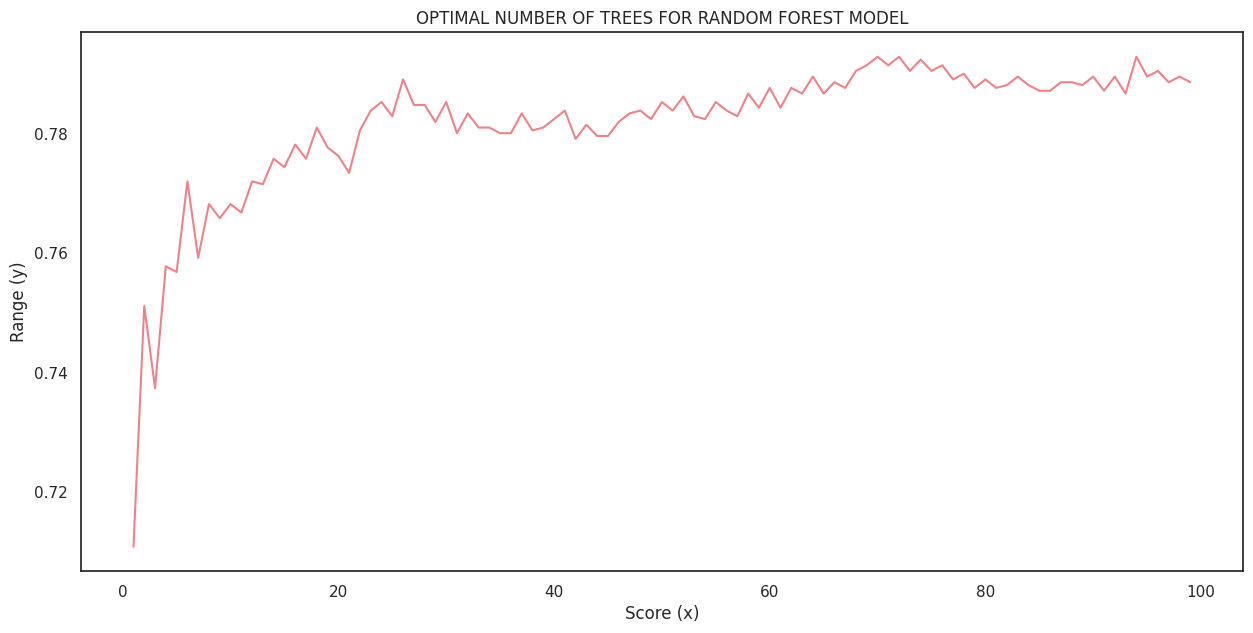

In [ ]:
# Create a figure with specified size
fig = plt.figure(figsize=(15, 7))

# Plot data with specified color
plt.plot(range(1, 100), score_array, color='#ec838a')

# Set the x-axis label
plt.xlabel("Score (x)")

# Set the y-axis label
plt.ylabel("Range (y)")

# Set the title of the plot
plt.title("OPTIMAL NUMBER OF TREES FOR RANDOM FOREST MODEL")

# plt.legend(loc='top right', fontsize="medium")

# Display the plot
plt.show()

### **// Iteration - 2**

In [ ]:
# Define a function for model evaluation metrics
def model_evaluation(y_test, y_pred, model_name):
    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2.0)

    # Create a DF to store results
    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]], columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "F2 Score"])

    # Sort results based on precision, recall, and F2 score
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending=False)
    return results

In [ ]:
# Logistic Regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Support Vector Classifier
classifier2 = SVC(kernel='linear', random_state=0)
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)

# K-Nearest Neighbour
classifier3 = KNeighborsClassifier(n_neighbors=22, metric="minkowski", p=2)
classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_test)

# Kernel SVM
classifier4 = SVC(kernel="rbf", random_state=0)
classifier4.fit(X_train, y_train)
y_pred4 = classifier4.predict(X_test)

# Gaussian Naive Bayes
classifier5 = GaussianNB()
classifier5.fit(X_train, y_train)
y_pred5 = classifier5.predict(X_test)

# Decision Tree Classifier
classifier6 = DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier6.fit(X_train, y_train)
y_pred6 = classifier6.predict(X_test)

# Random Forest
classifier7 = RandomForestClassifier(n_estimators=72, criterion="entropy", random_state=0)
classifier7.fit(X_train, y_train)
y_pred7 = classifier7.predict(X_test)

# AdaBoost
classifier8 = AdaBoostClassifier()
classifier8.fit(X_train, y_train)
y_pred8 = classifier8.predict(X_test)

# Gradient Boosting Classifier
classifier9 = GradientBoostingClassifier()
classifier9.fit(X_train, y_train)
y_pred9 = classifier9.predict(X_test)

# Voting Classifier
classifier10 = VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()), ('lr', LogisticRegression()), ('abc', AdaBoostClassifier())], voting='soft')
classifier10.fit(X_train, y_train)
y_pred10 = classifier10.predict(X_test)

In [ ]:
# Evaluate different models
lr = model_evaluation(y_test, y_pred, "Logistic Regression")
svm = model_evaluation(y_test, y_pred2, "Support Vector Classifier")
knn = model_evaluation(y_test, y_pred3, "K-Nearest Neighbour")
k_svm = model_evaluation(y_test, y_pred4, "Kernel SVM")
nb = model_evaluation(y_test, y_pred5, "Gaussian Naive Bayes")
dt = model_evaluation(y_test, y_pred6, "Decision Tree Classifier")
rf = model_evaluation(y_test, y_pred7, "Random Forest")
ab = model_evaluation(y_test, y_pred8, "AdaBoost")
gb = model_evaluation(y_test, y_pred9, "Gradient Boosting Classifier")
vc = model_evaluation(y_test, y_pred10, "Voting Classifier")

In [ ]:
# Concatenate and sort evaluation metrics DF
eval_ = pd.concat([lr, svm, knn, k_svm, nb, dt, rf, ab, gb, vc]).sort_values(["Precision", "Recall", "F2 Score"], ascending=False).reset_index(drop=True)
eval_

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
0,AdaBoost,0.812322,0.687927,0.538324,0.604000,0.562803
1,Voting Classifier,0.808531,0.675615,0.538324,0.599206,0.561130
2,Gradient Boosting Classifier,0.805213,0.672018,0.522282,0.587763,0.546642
3,Kernel SVM,0.793839,0.659898,0.463458,0.544503,0.492798
4,Logistic Regression,0.805687,0.658281,0.559715,0.605010,0.576994
5,Random Forest,0.796682,0.650685,0.508021,0.570571,0.531320
6,K-Nearest Neighbour,0.789100,0.628889,0.504456,0.559842,0.525241
7,Support Vector Classifier,0.788626,0.628635,0.500891,0.557540,0.522111
8,Gaussian Naive Bayes,0.756872,0.531088,0.730838,0.615154,0.679708
9,Decision Tree Classifier,0.732701,0.497364,0.504456,0.500885,0.503022


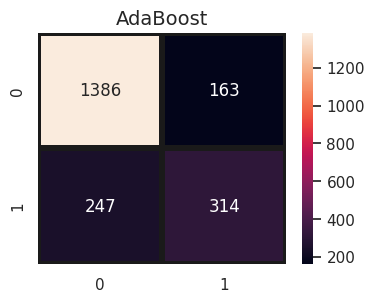

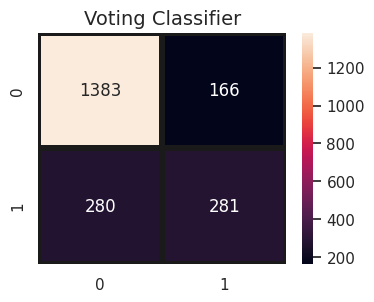

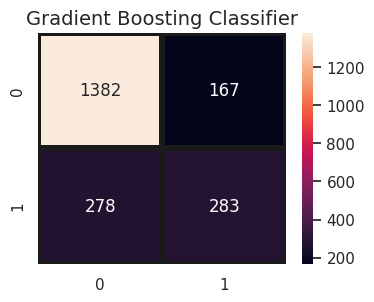

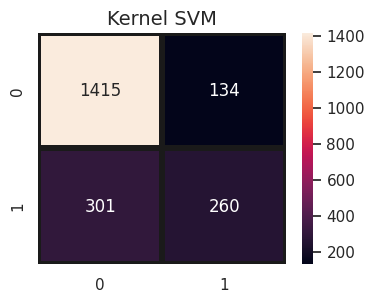

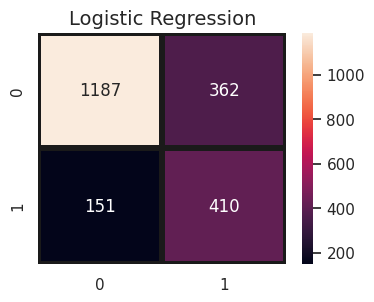

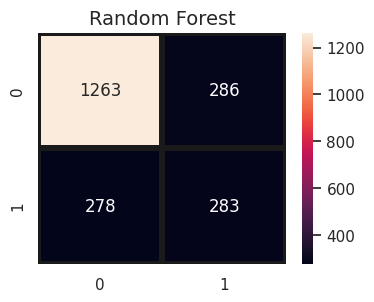

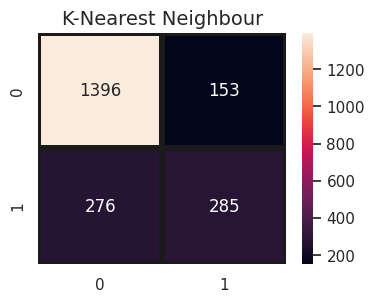

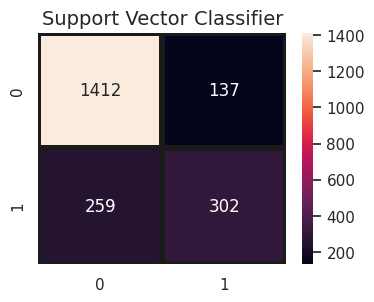

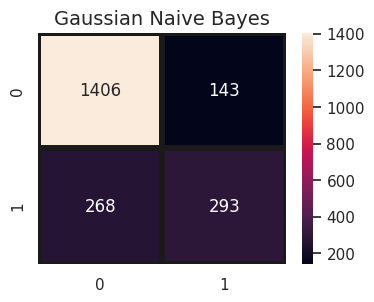

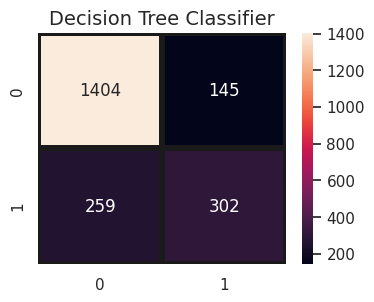

In [ ]:
# Create a list of predictions
predictions = [y_pred, y_pred2, y_pred3, y_pred4, y_pred5, y_pred6, y_pred7, y_pred8, y_pred9, y_pred10]

# Iterate over predictions and corresponding model names
for i, j in zip(predictions, eval_.Model.values):
    # Create a figure for each confusion matrix
    plt.figure(figsize=(4, 3))

    # Plot heatmap of confusion matrix
    sns.heatmap(confusion_matrix(y_test, i), annot=True, fmt="d", linecolor="k", linewidths=3)

    # Set the title of the plot
    plt.title(j, fontsize=14)

    # Display the plot
    plt.show()

### **// Model evaluation**

In [ ]:
# Define a function for k-fold cross-validation
def k_fold_cross_validation(classifier_name, name):
    accuracies = cross_val_score(estimator=classifier_name, X=X_train, y=y_train, cv=10)
    print(name, "Accuracy: %0.2f (+/- %0.2f)" % (accuracies.mean(), accuracies.std() * 2))

In [ ]:
# Call the 'k_fold_cross_validation' function for each classifier
k_fold_cross_validation(classifier, "Logistic regression")
k_fold_cross_validation(classifier2, "Support Vector Classifier")
k_fold_cross_validation(classifier3, "K-Nearest Neighbour")
k_fold_cross_validation(classifier4, "Kernel SVM")
k_fold_cross_validation(classifier5, "Gaussian Naive Bayes")
k_fold_cross_validation(classifier6, "Decision Tree Classifier")
k_fold_cross_validation(classifier7, "Random Forest")
k_fold_cross_validation(classifier8, "AdaBoost")
k_fold_cross_validation(classifier9, "Gradient Boosting Classifier")
k_fold_cross_validation(classifier10, "Voting Classifier")

Logistic regression Accuracy: 0.80 (+/- 0.04)
Support Vector Classifier Accuracy: 0.79 (+/- 0.04)
K-Nearest Neighbour Accuracy: 0.78 (+/- 0.03)
Kernel SVM Accuracy: 0.80 (+/- 0.03)
Gaussian Naive Bayes Accuracy: 0.75 (+/- 0.04)
Decision Tree Classifier Accuracy: 0.73 (+/- 0.03)
Random Forest Accuracy: 0.79 (+/- 0.03)
AdaBoost Accuracy: 0.80 (+/- 0.03)
Gradient Boosting Classifier Accuracy: 0.80 (+/- 0.04)
Voting Classifier Accuracy: 0.80 (+/- 0.04)


In [ ]:
# Define a ROC curve function
def ROC_curve(classifier_, name, y_pred_):
    # Fit the classifier model on training data
    classifier_.fit(X_train, y_train)

    # Get predicted probabilities for the test data
    probs = classifier_.predict_proba(X_test)
    probs = probs[:, 1]

    # Calculate the ROC AUC score
    classifier_roc_auc = roc_auc_score(y_test, probs)

    # Calculate ROC curve values
    rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier_.predict_proba(X_test)[:,1])

    # Plot the ROC curve
    plt.figure(figsize=(14, 6))
    label_ = name + '(area = %0.2f)' % classifier_roc_auc
    plt.plot(rf_fpr, rf_tpr, label=label_)

    # Plot the base rate line
    plt.plot([0, 1], [0, 1], label='Base Rate' 'k--')

    # Set plot limits and labels
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (x)')
    plt.ylabel('True Positive Rate (y)')
    plt.title('ROC GRAPH')

    # Display legend and show the plot
    # plt.legend(loc="lower right", fontsize="medium")
    plt.show()

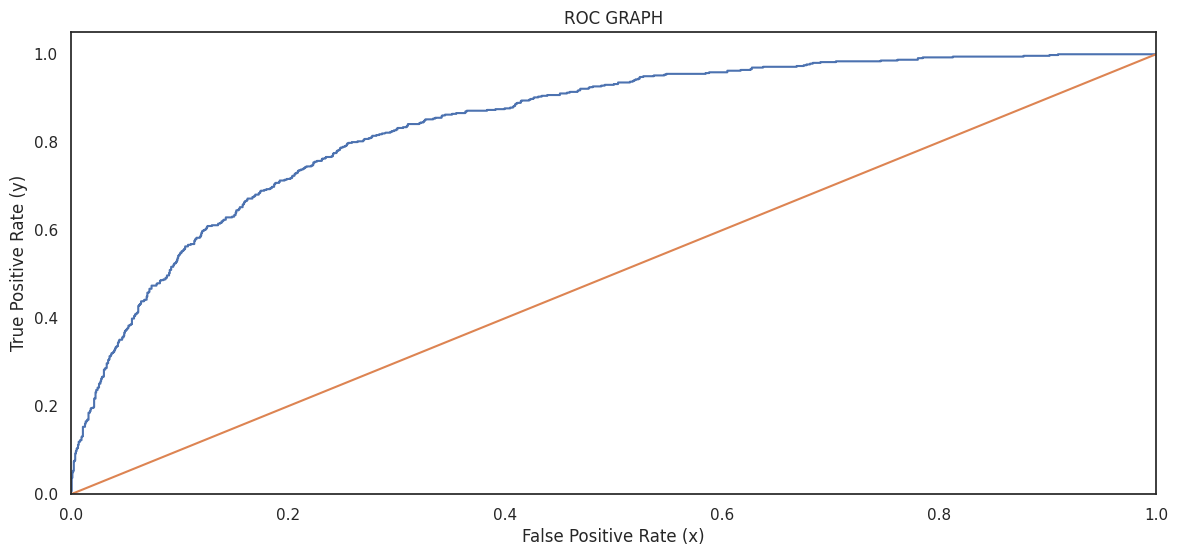

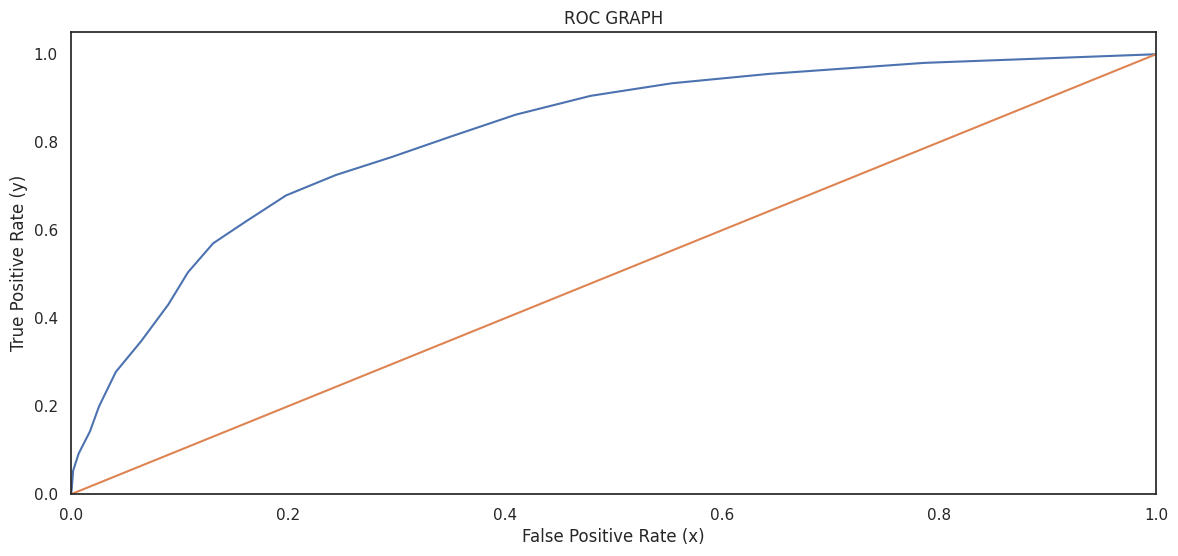

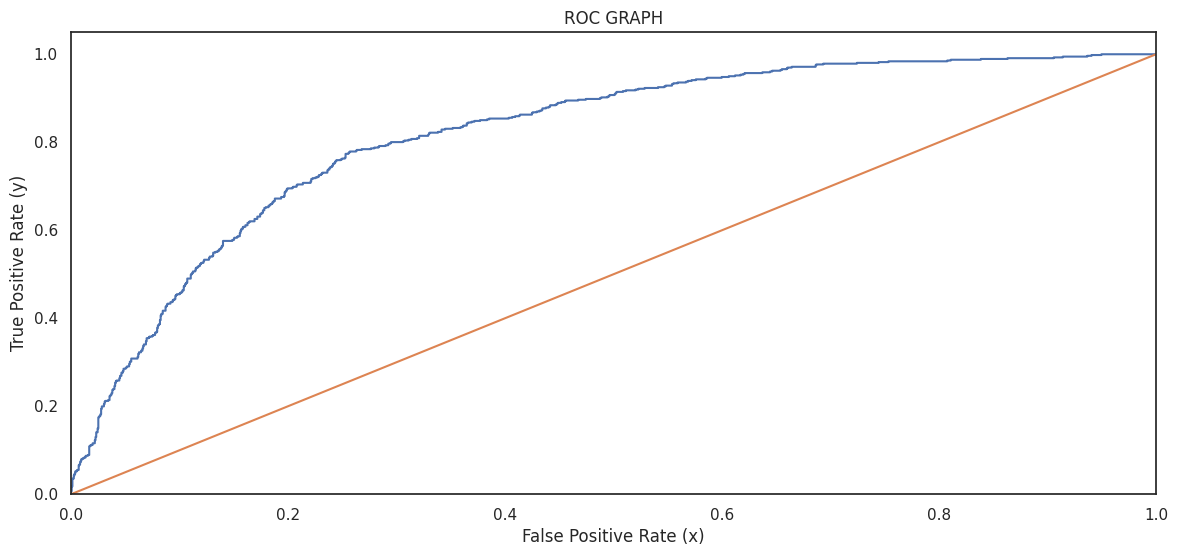

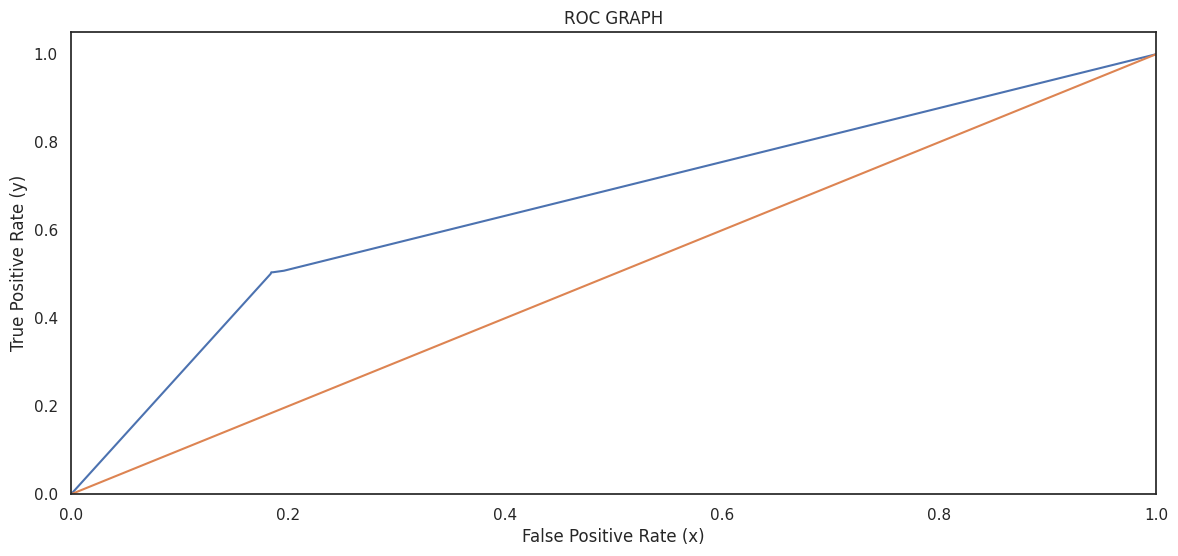

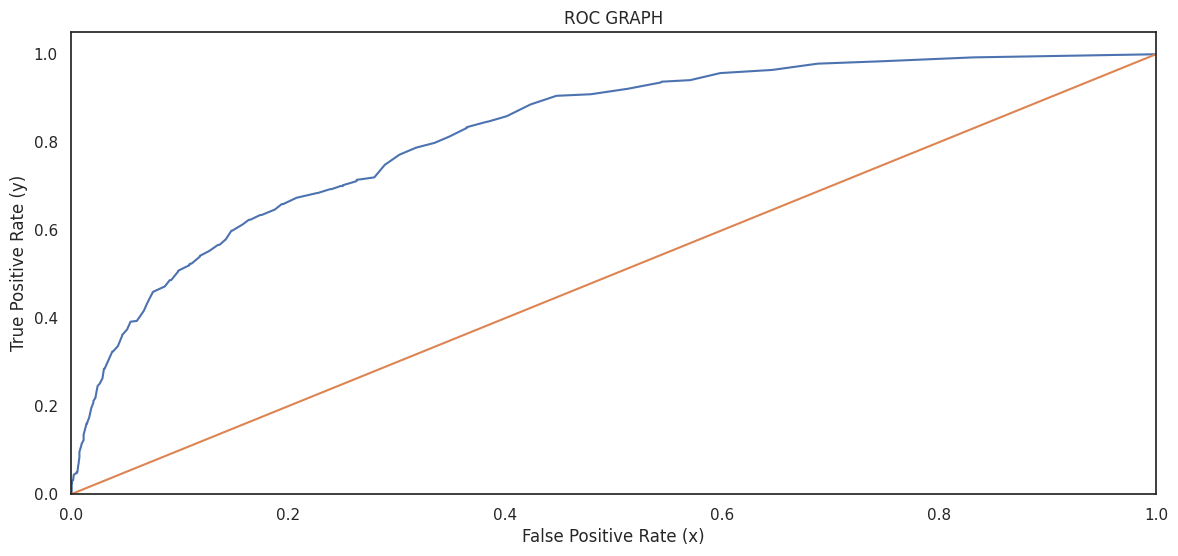

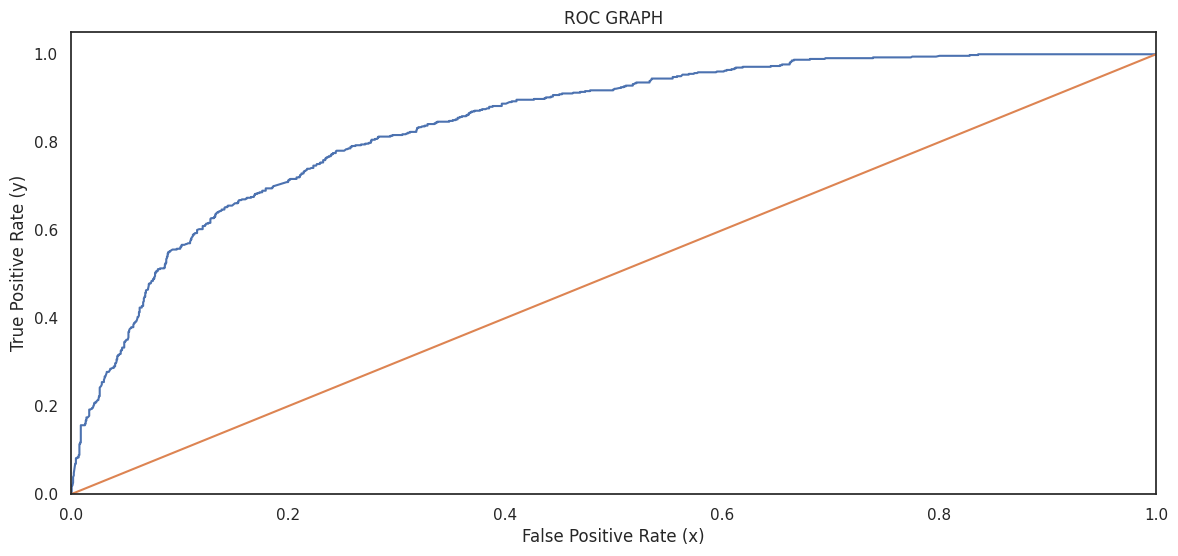

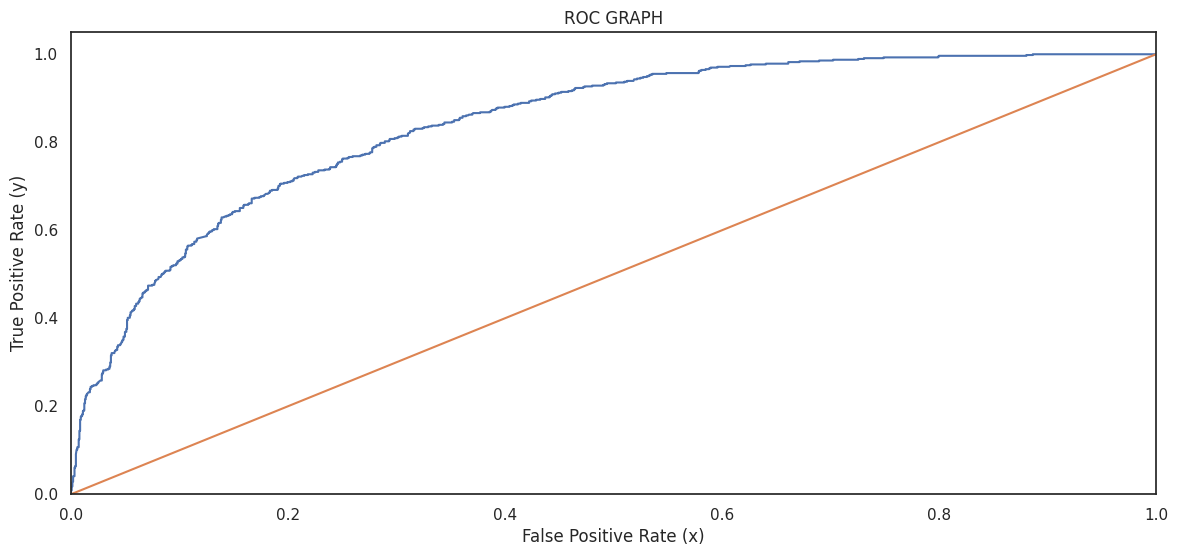

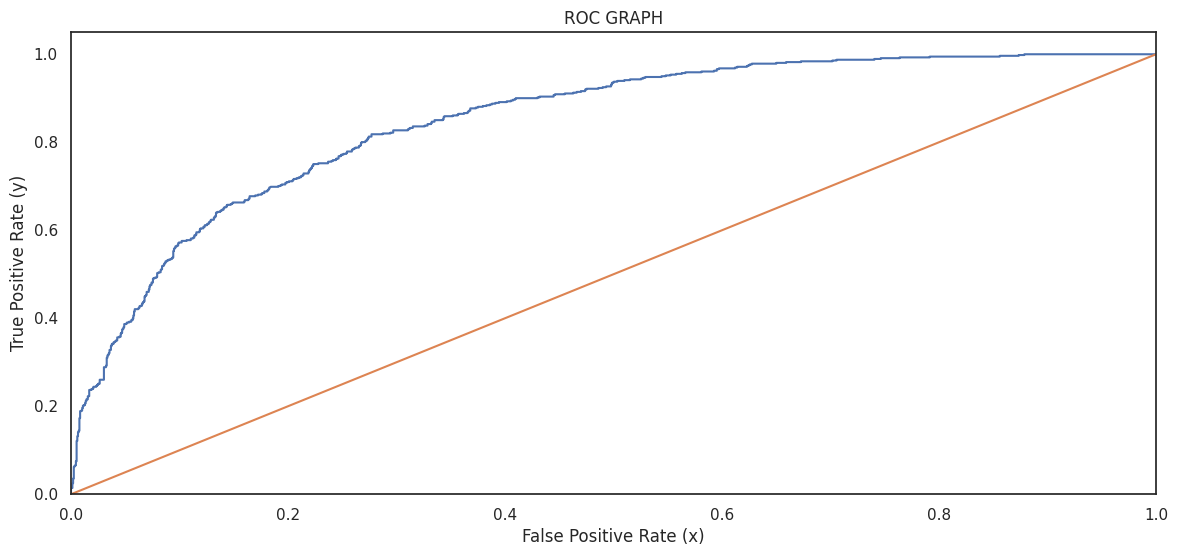

In [ ]:
# Define lists of predictions, classifiers, and model names
preds = [y_pred, y_pred3, y_pred5, y_pred6, y_pred7, y_pred8, y_pred9, y_pred10]
classifiers = [classifier, classifier3, classifier5, classifier6, classifier7, classifier8, classifier9, classifier10]
model_names_ = ["Logistic Regression", "K-Nearest Neighbour", "Gaussian Naive Bayes", "Decision Tree Classifier", "Random Forest", "AdaBoost", "Gradient Boosting Classifier", "Voting Classifier"]

# Loop through each classifiers, model names, and predictions
for i, j, k in zip(classifiers, model_names_, predictions):
    # Call the ROC_curve function with classifier, model name, and prediction as arguments
    ROC_curve(i, j, k)

In [ ]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score

# Define a cross-validation Dictionary Generator function
def cvDictGen(functions, scr, X_train=X, y_train=y, cv=5):
    # Initialize a cross-validation Dictionary
    cvDict = {}
    # Loop through each function
    for func in functions:
        # Compute cross-validation Score
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, scoring=scr)
        # Store mean and standard deviation in cvDict
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    # Return the cross-validation Dictionary
    return cvDict

In [ ]:
# Generate the cross-validated scores Dictionary
cvD = cvDictGen(classifiers, scr='roc_auc')

# Print the result
cvD

{'LogisticRegression': [0.8412898911234723, 0.010562365121610635],
 'KNeighborsClassifier': [0.7912224037496567, 0.008216648481710182],
 'GaussianNB': [0.8232386881685605, 0.00741678015498337],
 'DecisionTreeClassifier': [0.6470213137060805, 0.02196953973039052],
 'RandomForestClassifier': [0.8197874155380965, 0.011556155864106703],
 'AdaBoostClassifier': [0.8445838813774079, 0.01125665302188384],
 'GradientBoostingClassifier': [0.8446859725923037, 0.010822375163343558],
 'VotingClassifier': [0.8468200020298706, 0.010916795729150457]}

### **// Feature importance**

In [ ]:
# AdaBoost Classifier:
# Sort the feature_importances
feature_importances = pd.concat([pd.DataFrame(data.columns, columns=["features"]), pd.DataFrame(np.transpose(classifier8.feature_importances_), columns=["coef"])], axis=1)

# Print 'feature_importances.sort_values' in descending order
feature_importances.sort_values(by="coef", ascending=False)

,features,coef
18,TotalCharges,0.34
17,MonthlyCharges,0.20
4,tenure,0.14
14,Contract,0.12
16,PaymentMethod,0.04
8,OnlineSecurity,0.04
10,DeviceProtection,0.02
15,PaperlessBilling,0.02
11,TechSupport,0.02
9,OnlineBackup,0.02


In [ ]:
# Gradient Boosting Classifier:
# Sort the feature_importances
feature_importances = pd.concat([pd.DataFrame(data.columns, columns=["features"]), pd.DataFrame(np.transpose(classifier9.feature_importances_), columns=["coef"])], axis=1)

# Print 'feature_importances.sort_values' in descending order
feature_importances.sort_values(by="coef", ascending=False)

,features,coef
14,Contract,0.403880
4,tenure,0.142274
17,MonthlyCharges,0.135390
18,TotalCharges,0.107215
8,OnlineSecurity,0.064292
11,TechSupport,0.055295
7,InternetService,0.024642
16,PaymentMethod,0.012239
1,SeniorCitizen,0.011853
15,PaperlessBilling,0.009874


### **// Hyperparameter tuning:**

### **// AdaBoost Classifier (RandomizedSearchCV)**

In [ ]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define hyperparameters for AdaBoost classifier
adaHyperParams = {"n_estimators": [10, 50, 100, 200, 420],
                  "learning_rate": [0.001, 0.01, 0.1, 0.3]}

# Initialize RandomizedSearchCV with AdaBoost classifier, hyperparameters, and scoring metric
gridSearchAda = RandomizedSearchCV(estimator=classifier8, param_distributions=adaHyperParams, n_iter=5, scoring='roc_auc')

# Fit the RandomizedSearchCV on training data
gridSearchAda.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostClassifier(), n_iter=5,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.3],
                                        'n_estimators': [10, 50, 100, 200,
                                                         420]},
                   scoring='roc_auc')

In [ ]:
gridSearchAda.best_params_, gridSearchAda.best_score_

({'n_estimators': 50, 'learning_rate': 0.3}, 0.8448963397218023)

In [ ]:
# Fit the best estimator found by 'gridSearchAda' on the training data
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_train, y_train)

In [ ]:
# Predict probabilities for the test data
test_labels = bestAdaModFitted.predict_proba(np.array(X_test.values))[:,1]

# Calculate the ROC AUC score using the predicted probabilities and actual test labels
roc_auc_score(y_test, test_labels, average='macro', sample_weight=None)

0.8451108126800224

### **// Gradient Boosting Classifier (RandomizedSearchCV)**

In [ ]:
# Define hyperparameters for Gradient Boosting Classifier
gbHyperParams = {'loss': ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1, 10)}

# Initialize RandomizedSearchCV with Gradient Boosting classifier, hyperparameters, and scoring metric
gridSearchGB = RandomizedSearchCV(estimator=classifier9, param_distributions=gbHyperParams, n_iter=10, scoring='roc_auc')

# Fit the RandomizedSearchCV on training data
gridSearchGB.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'loss': ['deviance', 'exponential'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a632cf7eec0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a632cffe6b0>},
                   scoring='roc_auc')

In [ ]:
gridSearchGB.best_params_, gridSearchGB.best_score_

({'loss': 'exponential', 'max_depth': 2, 'n_estimators': 292},
 0.8423754849301478)

In [ ]:
# Fit the best estimator found by 'gridSearchGB' on the training data
bestGBModFitted = gridSearchGB.best_estimator_.fit(X_train, y_train)

In [ ]:
# Predict probabilities for the test data
test_labels_GB = bestGBModFitted.predict_proba(np.array(X_test.values))[:,1]

# Calculate the ROC AUC score using the predicted probabilities and actual test labels
roc_auc_score(y_test, test_labels_GB, average='macro', sample_weight=None)

0.8339697050250348

### **// AdaBoost Classifier (GridSearchCV)**

In [ ]:
ABC = AdaBoostClassifier()

# Define parameter grid for GridSearchCV
ABC_param_grid = {
    "n_estimators": [10, 50, 100, 200, 420],
    "learning_rate": [0.001, 0.01, 0.1, 0.3]
    }

# Initialize GridSearchCV with AdaBoost classifier, parameter grid, and other settings
gsABC = GridSearchCV(ABC, param_grid=ABC_param_grid, cv=10, scoring="roc_auc", n_jobs=6, verbose=1)

# Fit the GridSearchCV to training data
gsABC.fit(X_train, y_train)

# Get the best estimator
ada_best = gsABC.best_estimator_

# Print the best estimator and its score
print(ada_best)
print(gsABC.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
AdaBoostClassifier(learning_rate=0.1, n_estimators=200)
0.8470662551660079


In [ ]:
# Fit the 'GridSearchCV' to find the best ABC model
bestAdaModFitted2 = gsABC.best_estimator_.fit(X_train, y_train)

In [ ]:
# Predict probabilities for the test data
test_labels = bestAdaModFitted2.predict_proba(np.array(X_test.values))[:,1]

# Calculate the ROC AUC score using the predicted probabilities and actual test labels
roc_auc_score(y_test, test_labels, average='macro', sample_weight=None)

0.8451764061455324

### **// Gradient Boosting Classifier (GridSearchCV)**

In [ ]:
# Define parameter grid for GridSearchCV
gb_param_grid = {'loss': ['deviance'],
                 'n_estimators': [10, 100, 200, 300],
                 'max_depth': [1, 2, 4, 6, 8]}

# Initialize GridSearchCV with Gradient Boosting classifier, parameter grid, and other settings
gsGB = GridSearchCV(classifier9, param_grid=gb_param_grid, cv=10, scoring="roc_auc", n_jobs=6, verbose=1)

# Fit the GridSearchCV to training data
gsGB.fit(X_train, y_train)

# Get the best estimator
gb_best = gsGB.best_estimator_

# Print the best estimator and its score
print(gb_best)
print(gsGB.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
GradientBoostingClassifier(loss='deviance', max_depth=1, n_estimators=300)
0.8481591522663035


In [ ]:
# Fit the 'GridSearchCV' to find the best GBC model
bestGBModFitted2 = gsGB.best_estimator_.fit(X_train, y_train)

In [ ]:
# Predict probabilities for the test data
test_labels_gb2 = bestGBModFitted2.predict_proba(np.array(X_test.values))[:,1]

# Calculate the ROC AUC score using the predicted probabilities and actual test labels
roc_auc_score(y_test, test_labels_gb2, average='macro', sample_weight=None)

0.8403339973233261